In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [True, True, True,]

In [21]:
target_cols_ratio = [4, 4, 4,]

In [331]:
target_cols_kde = ['위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling',
                  ]

In [23]:
csv_path = './output/소화기능_위장소화기능.csv'

In [24]:
model_path_man = './model/0702_man.pkl'

In [25]:
model_path_woman = './model/0702_woman.pkl'

In [26]:
# 결측치
fill_th = 1
fill_th_score = 90

# 이상소견 Load

In [27]:
# with open('../input/TEST_갑상선이상소견추출241127.json', encoding='utf-8') as f:
with open('../input/DM_기능나이_장비검사_이상소견241210.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw_text = pd.DataFrame(js)

In [28]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131105 entries, 0 to 1131104
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
dtypes: int64(3), object(6)
memory usage: 77.7+ MB


In [29]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [30]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)
0,2022,242726,974419,None,None,None,None,없음,정상
1,2022,242726,1354580,None,None,None,None,없음,정상
2,2022,242726,2513468,None,None,None,None,없음,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검
4,2022,242728,993356,None,None,None,없음,없음,None


In [31]:
len(raw_text)

1131105

In [32]:
raw_text = raw_text.drop_duplicates(subset=['검진년도', 'UID', 'CU_REC_ID'], keep='first')

In [33]:
len(raw_text)

1131105

In [34]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [35]:
raw_text_real = raw_text.copy()

## 위내시경 Data Load

In [36]:
score_text = '위내시경 (Endo)'
score_text_real = '위내시경'

In [37]:
raw_text = raw_text_real.copy()

In [38]:
raw_text.rename(columns={score_text:score_text + '_text'}, inplace=True)

In [39]:
raw_text['std_str'] = raw_text[score_text + '_text'].str.replace(' ', '')

In [40]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)_text         829744 non-null   object
 9   std_str                  829744 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [41]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)_text,std_str
0,2022,242726,974419,None,None,None,None,없음,정상,정상
1,2022,242726,1354580,None,None,None,None,없음,정상,정상
2,2022,242726,2513468,None,None,None,None,없음,정상,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,미검
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염","경도의역류성식도염,중등도만성표재성위염"
...,...,...,...,...,...,...,...,...,...,...
1131099,2024,1494531,3019796,None,None,None,None,없음,만성표재성위염,만성표재성위염
1131100,2024,1494543,3019891,None,None,None,None,None,"역류성식도염,만성위축성위염,만성표재성위염,위점막하종양","역류성식도염,만성위축성위염,만성표재성위염,위점막하종양"
1131101,2024,1494547,3019925,None,None,정상,None,없음,만성위축성위염,만성위축성위염
1131102,2024,1494556,3020025,None,None,None,None,없음,"역류성식도염,만성표재성위염","역류성식도염,만성표재성위염"


## 라벨링 데이터 join

In [42]:
raw_text_labeling = pd.read_excel('../input/' + score_text +'.xlsx')

In [43]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity
0,위내시경 (Endo),역류성 식도염,38597.0,역류성식도염,"['역류$', '성%', '식도%', '염$']",1.0,0.0,역류성식도염,4.0
1,위내시경 (Endo),미란성 위염,24168.0,미란성위염,"['미란$', '성%', '위염$']",1.0,0.0,미란성위염,2.0
2,위내시경 (Endo),만성 위축성 위염,23284.0,만성위축성위염,"['만성%', '위축$', '성%', '위염$']",1.0,0.0,만성위축성위염,6.0
3,위내시경 (Endo),만성 표재성 위염,17039.0,만성표재성위염,"['만성%', '표재성%', '위염$']",1.0,0.0,만성표재성위염,4.0
4,위내시경 (Endo),위염,16027.0,위염,['위염$'],1.0,0.0,위염,2.0


In [44]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        18497 non-null  object 
 1   label       18495 non-null  object 
 2   cnt         18495 non-null  float64
 3   strip       18495 non-null  object 
 4   standard    18495 non-null  object 
 5   flag        18495 non-null  float64
 6   error_flag  18495 non-null  float64
 7   std_str     18497 non-null  object 
 8   severity    13926 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.3+ MB


In [45]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,역류성식도염,4.0
1,미란성위염,2.0
2,만성위축성위염,6.0
3,만성표재성위염,4.0
4,위염,2.0
...,...,...
18492,흉통등의증상이있음,NaN
18493,흑색출혈반,2.0
18494,흑색증,NaN
18495,위평활근종,5.0


In [46]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str   severity
미란성위염     2.0         14
역류성식도염    4.0         10
위점막하종양의심  9.0          9
위용종       5.0          9
위식도역류질환   4.0          8
위축성미란성위염  2.0          8
만성위축성위염   6.0          8
위상피하종양    5.0          8
만성표재성위염   4.0          8
식도상피하종양   5.0          7
dtype: int64

In [47]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15758 entries, 0 to 18495
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   15758 non-null  object 
 1   severity  11391 non-null  float64
dtypes: float64(1), object(1)
memory usage: 369.3+ KB


In [48]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [49]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)_text         829744 non-null   object 
 9   std_str                  829744 non-null   object 
 10  severity                 466285 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [50]:
raw_text[raw_text[score_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)_text,std_str,severity
0,2022,242726,974419,None,None,None,None,없음,정상,정상,0.0
1,2022,242726,1354580,None,None,None,None,없음,정상,정상,0.0
2,2022,242726,2513468,None,None,None,None,없음,정상,정상,0.0
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,미검,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염","경도의역류성식도염,중등도만성표재성위염",NaN


In [51]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [52]:
raw_text['severity2'] = raw_text[score_text + '_text'].apply(max_value)

In [53]:
raw_text[raw_text[score_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)_text,std_str,severity,severity2
0,2022,242726,974419,None,None,None,None,없음,정상,정상,0.0,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,정상,0.0,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,정상,0.0,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,미검,NaN,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염","경도의역류성식도염,중등도만성표재성위염",NaN,4.0


In [54]:
raw_text['severity'].value_counts()

4.0     215649
6.0      86054
2.0      83762
0.0      66443
5.0      11979
9.0       1350
3.0        678
1.0        328
8.0         29
10.0        11
7.0          2
Name: severity, dtype: int64

In [55]:
raw_text['severity2'].value_counts()

4.0     137733
6.0     114663
5.0      53362
2.0      11681
9.0       7188
10.0      1993
3.0        700
8.0        405
1.0         65
7.0         28
0.0          4
Name: severity2, dtype: int64

In [56]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)_text         829744 non-null   object 
 9   std_str                  829744 non-null   object 
 10  severity                 466285 non-null   float64
 11  severity2                327822 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [57]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)_text,std_str,severity,severity2


In [58]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [59]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)_text         829744 non-null   object 
 9   std_str                  829744 non-null   object 
 10  severity                 466285 non-null   float64
 11  severity2                327822 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [60]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [61]:
len(arr)

1131105

In [62]:
raw_text[score_text_real] = arr

In [63]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)_text,std_str,severity,severity2,위내시경
0,2022,242726,974419,None,None,None,None,없음,정상,정상,0.0,NaN,0.0
1,2022,242726,1354580,None,None,None,None,없음,정상,정상,0.0,NaN,0.0
2,2022,242726,2513468,None,None,None,None,없음,정상,정상,0.0,NaN,0.0
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,미검,NaN,NaN,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,None,NaN,NaN,NaN


In [64]:
raw_text_copy = raw_text.copy()

## 상복부초음파 Data Load

In [65]:
score_text2 = '상복부초음파 (Abdominal Sono)'
score_text_real2 = '상복부초음파'

In [66]:
raw_text = raw_text_real.copy()

In [67]:
raw_text.rename(columns={score_text2:score_text2 + '_text'}, inplace=True)

In [68]:
raw_text['std_str'] = raw_text[score_text2 + '_text'].str.replace(' ', '')

In [69]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   검진년도                          1131105 non-null  int64 
 1   UID                           1131105 non-null  int64 
 2   CU_REC_ID                     1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object
 5   대장내시경                         193596 non-null   object
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object
 7   심전도                           1030430 non-null  object
 8   위내시경 (Endo)                   829744 non-null   object
 9   std_str                       788807 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [70]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상
4,2022,242728,993356,None,None,None,없음,없음,None,없음
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상
...,...,...,...,...,...,...,...,...,...,...
1131080,2024,1494452,3016416,없음,None,None,없음,없음,None,없음
1131083,2024,1494460,3016622,None,None,None,지방간,None,None,지방간
1131094,2024,1494496,3019430,None,None,대장용종,지방간,없음,"만성위축성위염,장상피화생",지방간
1131095,2024,1494500,3019508,갑상선낭종,None,None,없음,없음,"역류성식도염,미란성위염",없음


## 라벨링 데이터 join

In [71]:
raw_text_labeling = pd.read_excel('../input/' + score_text_real2 +'.xlsx')

In [72]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity,kidney
0,상복부초음파 (Abdominal Sono),지방간,125777.0,지방간,['지방간$'],1.0,0.0,지방간,3.0,0
1,상복부초음파 (Abdominal Sono),담낭 용종,86346.0,담낭용종,"['담낭%', '용종$']",1.0,0.0,담낭용종,2.0,0
2,상복부초음파 (Abdominal Sono),신장 낭종,59376.0,신장낭종,"['신장%', '낭종$']",1.0,0.0,신장낭종,1.0,0
3,상복부초음파 (Abdominal Sono),간 낭종,54920.0,간낭종,"['간%', '낭종$']",1.0,0.0,간낭종,1.0,0
4,상복부초음파 (Abdominal Sono),없음,23450.0,없음,['없음$'],1.0,0.0,없음,0.0,0


In [73]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        6669 non-null   object 
 1   label       6669 non-null   object 
 2   cnt         6668 non-null   float64
 3   strip       6662 non-null   object 
 4   standard    6662 non-null   object 
 5   flag        6662 non-null   float64
 6   error_flag  6662 non-null   float64
 7   std_str     6669 non-null   object 
 8   severity    4834 non-null   float64
 9   kidney      6669 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 521.1+ KB


## 콩팥소견 제외

In [74]:
len(raw_text_labeling)

6669

In [75]:
raw_text_labeling = raw_text_labeling[raw_text_labeling['kidney'] == 0]

In [76]:
len(raw_text_labeling)

4909

In [77]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,지방간,3.0
1,담낭용종,2.0
2,신장낭종,1.0
3,간낭종,1.0
4,없음,0.0
...,...,...
6663,상복부결석,2.0
6664,상복부병변,2.0
6665,상복부석회화,2.0
6666,소장용종,2.0


In [78]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str   severity
담낭벽비후의심   5.0         8
만성간질환의심   8.0         7
신우주위낭종의심  3.0         6
간외담관확장    3.0         5
담낭벽비후     5.0         5
간혈관종의심    2.0         5
간외담관확장의심  3.0         5
신배확장의심    1.0         4
결절성병변의심   5.0         4
췌장낭성병변의심  5.0         4
dtype: int64

In [79]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 6667
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   4081 non-null   object 
 1   severity  2817 non-null   float64
dtypes: float64(1), object(1)
memory usage: 95.6+ KB


In [80]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [81]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      587123 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [82]:
raw_text[raw_text[score_text2 + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,0.0
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종,1.0
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간,3.0
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,0.0


In [83]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [84]:
raw_text['severity2'] = raw_text[score_text2 + '_text'].apply(max_value)

In [85]:
raw_text[raw_text[score_text2 + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,0.0,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종,1.0,NaN
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간,3.0,NaN
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,0.0,NaN


In [86]:
raw_text['severity'].value_counts()

0.0     311549
3.0     151673
2.0      65841
1.0      31002
5.0      17118
4.0       6076
6.0       2955
8.0        704
10.0       205
Name: severity, dtype: int64

In [87]:
raw_text['severity2'].value_counts()

3.0     88311
5.0     46051
2.0     21036
4.0     13783
6.0      8394
1.0      4992
8.0      1079
10.0      823
0.0         4
Name: severity2, dtype: int64

In [88]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      587123 non-null   float64
 11  severity2                     184473 non-null   float64
dtypes: float64(2), int64(3), obj

In [89]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2


In [90]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [91]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      587123 non-null   float64
 11  severity2                     184473 non-null   float64
dtypes: float64(2), int64(3), obj

In [92]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [93]:
len(arr)

1131105

In [94]:
raw_text[score_text_real2] = arr

In [95]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2,상복부초음파
0,2022,242726,974419,None,None,None,None,없음,정상,None,NaN,NaN,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,None,NaN,NaN,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,None,NaN,NaN,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,0.0,NaN,0.0
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0,NaN,0.0


In [96]:
raw_text_copy2 = raw_text.copy()

## 대장내시경 Data Load

In [97]:
score_text3 = '대장내시경'
score_text_real3 = '대장내시경'

In [98]:
raw_text = raw_text_real.copy()

In [99]:
raw_text.rename(columns={score_text3:score_text3 + '_text'}, inplace=True)

In [100]:
raw_text['std_str'] = raw_text[score_text3 + '_text'].str.replace(' ', '')

In [101]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경_text               193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
 9   std_str                  193596 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [102]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경_text,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str
11,2022,242740,958656,None,None,없음,지방간,None,None,없음
30,2022,242779,1155664,갑상선결절,없음,대장용종,지방간,없음,"식도미란,위점막이형성의심,역류성식도염",대장용종
51,2022,242814,1346511,None,정상,없음,지방간,없음,정상,없음
55,2022,242830,1184341,정상,None,정상,None,없음,"만성표지부위염,역류성식도염",정상
69,2022,242855,1155672,없음,None,비특이적대장염,없음,없음,"역류성식도염,미란성위염,위용종,경도의만성위축성위염",비특이적대장염
...,...,...,...,...,...,...,...,...,...,...
1131084,2024,1494463,3016649,None,None,대장용종,None,없음,만성표재성위염,대장용종
1131092,2024,1494490,3019104,None,없음,치질,None,없음,만성표재성위염,치질
1131094,2024,1494496,3019430,None,None,대장용종,지방간,없음,"만성위축성위염,장상피화생",대장용종
1131098,2024,1494530,3019779,None,None,"대장용종,대장용종절제술",None,없음,"역류성식도염,만성표재성위염,미란성위염","대장용종,대장용종절제술"


## 라벨링 데이터 join

In [103]:
raw_text_labeling = pd.read_excel('../input/' + score_text_real3 +'.xlsx')

In [104]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity
0,대장내시경,대장 용종,8748,대장용종,"['대장%', '용종$']",True,False,대장용종,5.0
1,대장내시경,없음,8716,없음,['없음$'],True,False,없음,0.0
2,대장내시경,대장 게실,4426,대장게실,"['대장%', '게실$']",True,False,대장게실,1.0
3,대장내시경,용종,3623,용종,['용종$'],True,False,용종,5.0
4,대장내시경,담낭 용종,1365,담낭용종,"['담낭%', '용종$']",True,False,담낭용종,2.0


In [105]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        5826 non-null   object 
 1   label       5826 non-null   object 
 2   cnt         5826 non-null   int64  
 3   strip       5826 non-null   object 
 4   standard    5826 non-null   object 
 5   flag        5826 non-null   bool   
 6   error_flag  5826 non-null   bool   
 7   std_str     5826 non-null   object 
 8   severity    4707 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 330.1+ KB


In [106]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,대장용종,5.0
1,없음,0.0
2,대장게실,1.0
3,용종,5.0
4,담낭용종,2.0
...,...,...
5821,흑색종의심,3.0
5822,흑색증및내치핵,5.0
5823,흡연색대장,NaN
5824,흡연성대장염,3.0


In [107]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str    severity
용종         5.0         12
대장용종       5.0         11
대장게실       1.0          6
저도관상선종     5.0          6
저도이형성관상선종  5.0          6
맹장용종       5.0          5
결장용종       5.0          5
위점막하종양     10.0         5
상행결장용종     5.0          5
대장점막하종양의심  10.0         5
dtype: int64

In [108]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 5825
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   5160 non-null   object 
 1   severity  4100 non-null   float64
dtypes: float64(1), object(1)
memory usage: 120.9+ KB


In [109]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [110]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경_text               193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  193596 non-null   object 
 10  severity                 165574 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [111]:
raw_text[raw_text[score_text3 + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경_text,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity
11,2022,242740,958656,None,None,없음,지방간,None,None,없음,0.0
30,2022,242779,1155664,갑상선결절,없음,대장용종,지방간,없음,"식도미란,위점막이형성의심,역류성식도염",대장용종,5.0
51,2022,242814,1346511,None,정상,없음,지방간,없음,정상,없음,0.0
55,2022,242830,1184341,정상,None,정상,None,없음,"만성표지부위염,역류성식도염",정상,0.0
69,2022,242855,1155672,없음,None,비특이적대장염,없음,없음,"역류성식도염,미란성위염,위용종,경도의만성위축성위염",비특이적대장염,3.0


In [112]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [113]:
raw_text['severity2'] = raw_text[score_text3 + '_text'].apply(max_value)

In [114]:
raw_text[raw_text[score_text3 + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경_text,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2
11,2022,242740,958656,None,None,없음,지방간,None,None,없음,0.0,NaN
30,2022,242779,1155664,갑상선결절,없음,대장용종,지방간,없음,"식도미란,위점막이형성의심,역류성식도염",대장용종,5.0,NaN
51,2022,242814,1346511,None,정상,없음,지방간,없음,정상,없음,0.0,NaN
55,2022,242830,1184341,정상,None,정상,None,없음,"만성표지부위염,역류성식도염",정상,0.0,NaN
69,2022,242855,1155672,없음,None,비특이적대장염,없음,없음,"역류성식도염,미란성위염,위용종,경도의만성위축성위염",비특이적대장염,3.0,NaN


In [115]:
raw_text['severity'].value_counts()

0.0     103884
5.0      46469
1.0       8118
3.0       4405
2.0       1992
10.0       676
8.0         30
Name: severity, dtype: int64

In [116]:
raw_text['severity2'].value_counts()

5.0     17575
3.0      2201
10.0      986
2.0       396
1.0       281
6.0       140
8.0        40
4.0         3
Name: severity2, dtype: int64

In [117]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경_text               193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  193596 non-null   object 
 10  severity                 165574 non-null   float64
 11  severity2                21622 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [118]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경_text,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2


In [119]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [120]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경_text               193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  193596 non-null   object 
 10  severity                 165574 non-null   float64
 11  severity2                21622 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [121]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [122]:
len(arr)

1131105

In [123]:
raw_text[score_text_real3] = arr

In [124]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경_text,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2,대장내시경
0,2022,242726,974419,None,None,None,None,없음,정상,None,NaN,NaN,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,None,NaN,NaN,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,None,NaN,NaN,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,None,NaN,NaN,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,None,NaN,NaN,NaN


In [125]:
raw_text_copy3 = raw_text.copy()

In [126]:
raw_text_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경_text               193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도                      1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  193596 non-null   object 
 10  severity                 165574 non-null   float64
 11  severity2                21622 non-null    float64
 12  대장내시경                    187196 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory 

## Join

In [127]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [128]:
raw['검진년도'] = raw['검진년도'].astype(int)

In [129]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   검진년도       1227553 non-null  int32
 1   UID        1227553 non-null  int64
 2   CU_REC_ID  1227553 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 23.4 MB


In [130]:
len(raw)

1227553

In [131]:
raw['대장내시경']

0            None
1            None
2            None
3            None
4            None
            ...  
1227548    장정결 불량
1227549    장정결 불량
1227550      None
1227551      None
1227552      None
Name: 대장내시경, Length: 1227553, dtype: object

In [134]:
raw.rename(columns={'대장내시경':'대장내시경_검사'}, inplace=True)

In [135]:
raw['대장내시경_검사']

0            None
1            None
2            None
3            None
4            None
            ...  
1227548    장정결 불량
1227549    장정결 불량
1227550      None
1227551      None
1227552      None
Name: 대장내시경_검사, Length: 1227553, dtype: object

In [136]:
raw = pd.merge(raw, raw_text_copy[['검진년도', 'UID', 'CU_REC_ID', score_text + '_text', score_text_real]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')
raw = pd.merge(raw, raw_text_copy2[['검진년도', 'UID', 'CU_REC_ID', score_text2 + '_text', score_text_real2]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')
raw = pd.merge(raw, raw_text_copy3[['검진년도', 'UID', 'CU_REC_ID', score_text3 + '_text', score_text_real3]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')

In [137]:
len(raw)

1227553

## 연령대 제한

In [138]:
len(raw)

1227553

In [139]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [140]:
len(raw)

1213899

In [141]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'P(인)', '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT', '위내시경 (Endo)_text',
       '위내시경', '상복부초음파 (Abdominal Sono)_text', '상복부초음파', '대장내시경_text',
       '대장내시경'],
      dtype='object', length=142)

In [142]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [143]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        score_text +'_text', score_text_real,   
        score_text2 +'_text', score_text_real2,
        score_text3 +'_text', score_text_real3,
       ]

df = raw[cols]

In [144]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경 (Endo)_text,위내시경,상복부초음파 (Abdominal Sono)_text,상복부초음파,대장내시경_text,대장내시경
0,2010,7282,2520,1,42,위축성위염,6.0,간혈관종의심,2.0,None,NaN
1,2010,7490,3638,1,39,"역류성식도염,홍반성위염",4.0,None,NaN,None,NaN
2,2010,7915,3997,1,36,None,NaN,None,NaN,None,NaN
3,2010,8056,4745,1,42,전립선비대증,NaN,None,NaN,None,NaN
4,2010,8457,3929,1,38,None,NaN,None,NaN,None,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   위내시경 (Endo)_text              771356 non-null   object 
 6   위내시경                          737991 non-null   float64
 7   상복부초음파 (Abdominal Sono)_text  737562 non-null   object 
 8   상복부초음파                        721294 non-null   float64
 9   대장내시경_text                    178664 non-null   object 
 10  대장내시경                         172807 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 97.2+ MB


In [146]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경 (Endo)_text', '위내시경',
       '상복부초음파 (Abdominal Sono)_text', '상복부초음파', '대장내시경_text', '대장내시경'],
      dtype='object')

<AxesSubplot:xlabel='index'>

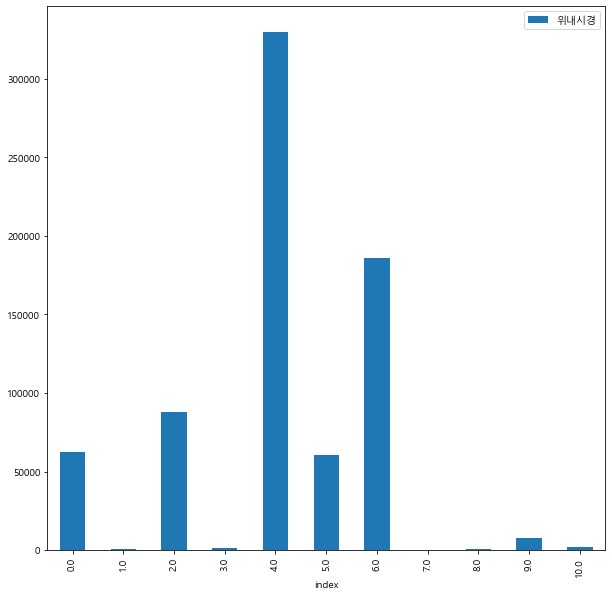

In [147]:
plt.rcParams["figure.figsize"] = (10, 10)
df[score_text_real].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=score_text_real)

<AxesSubplot:xlabel='index'>

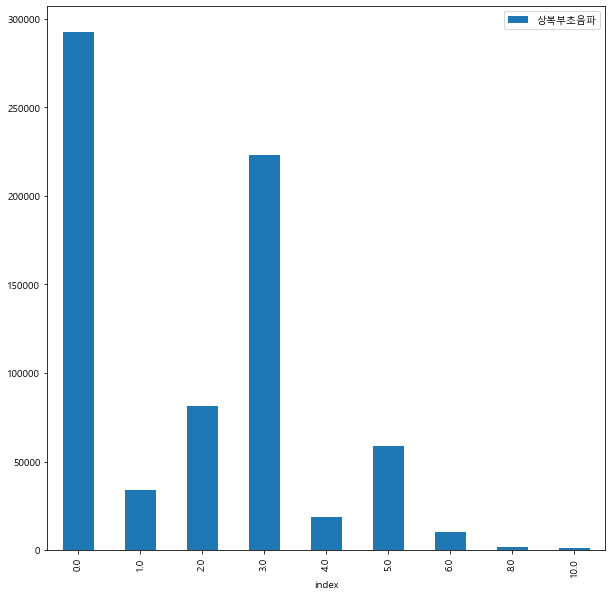

In [148]:
plt.rcParams["figure.figsize"] = (10, 10)
df[score_text_real2].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=score_text_real2)

<AxesSubplot:xlabel='index'>

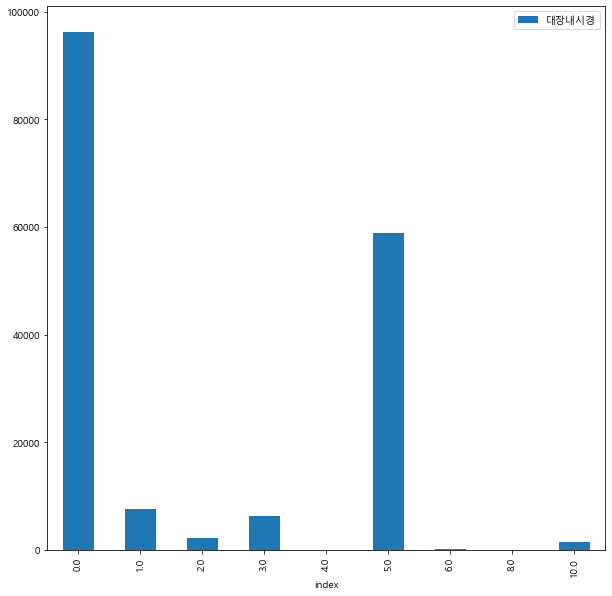

In [149]:
plt.rcParams["figure.figsize"] = (10, 10)
df[score_text_real3].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=score_text_real3)

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [150]:
df.isnull().sum()

검진년도                                  0
UID                                   0
CU_REC_ID                             0
SEX                                   0
검진당시나이                                0
위내시경 (Endo)_text                 442543
위내시경                             475908
상복부초음파 (Abdominal Sono)_text     476337
상복부초음파                           492605
대장내시경_text                      1035235
대장내시경                           1041092
dtype: int64

In [151]:
df_group = df.groupby(['UID', '검진년도'])

In [152]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [153]:
temp

['위내시경 (Endo)_text',
 '위내시경',
 '상복부초음파 (Abdominal Sono)_text',
 '상복부초음파',
 '대장내시경_text',
 '대장내시경']

In [154]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 위내시경 (Endo)_text
column : 위내시경
column : 상복부초음파 (Abdominal Sono)_text
column : 상복부초음파
column : 대장내시경_text
column : 대장내시경
3761.00689 sec


In [155]:
df.isnull().sum()

검진년도                                  0
UID                                   0
CU_REC_ID                             0
SEX                                   0
검진당시나이                                0
위내시경 (Endo)_text                 396869
위내시경                             431828
상복부초음파 (Abdominal Sono)_text     433044
상복부초음파                           450080
대장내시경_text                      1024055
대장내시경                           1030237
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [156]:
numeric_col = df.drop(columns=[score_text + '_text', score_text2 + '_text', score_text3 + '_text']).columns

In [157]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   위내시경 (Endo)_text              817030 non-null   object 
 6   위내시경                          782071 non-null   float64
 7   상복부초음파 (Abdominal Sono)_text  780855 non-null   object 
 8   상복부초음파                        763819 non-null   float64
 9   대장내시경_text                    189844 non-null   object 
 10  대장내시경                         183662 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 97.2+ MB


In [159]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,782071.000000,763819.000000,183662.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,4.065133,1.824758,1.962137
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.814904,1.782473,2.437138
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,4.000000,0.000000,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,4.000000,2.000000,0.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,6.000000,3.000000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,10.000000,10.000000,10.000000


In [160]:
df[score_text_real].value_counts()

4.0     349984
6.0     195332
2.0      93944
0.0      66878
5.0      63509
9.0       8219
10.0      1982
3.0       1381
8.0        416
1.0        397
7.0         29
Name: 위내시경, dtype: int64

In [161]:
df[score_text_real2].value_counts()

0.0     310695
3.0     236245
2.0      86208
5.0      62035
1.0      35571
4.0      19437
6.0      10922
8.0       1726
10.0       980
Name: 상복부초음파, dtype: int64

In [162]:
df[score_text_real3].value_counts()

0.0     102739
5.0      62119
1.0       8108
3.0       6597
2.0       2302
10.0      1592
6.0        138
8.0         64
4.0          3
Name: 대장내시경, dtype: int64

In [242]:
df_result = df.drop(columns=[score_text + '_text', score_text2 + '_text', score_text3 + '_text']).copy()

# 이상치 제거

In [243]:
len(df_result)

1213899

In [244]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [245]:
temp = df_result.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [246]:
# # IQR 기준 이상치 개수 확인
# # target_cols = [
# #                '검진당시나이', 
# # #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
# #                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
# #                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
# #                ]
# target_cols = temp

# minimums = []
# maximums = []

# for col in target_cols:
#     target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
#     print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
#     print()
#     minimums.append(temp_min)
#     maximums.append(temp_max)

# for idx, col in enumerate(target_cols):    
#     target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
#     df_result = df_result.drop(target_outlier.index)
#     df_result.reset_index(drop=True, inplace=True)

In [247]:
minimums = [0, 0, 0,]
maximums = [10, 10, 10,]

In [248]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [249]:
minimums

[0, 0, 0]

In [250]:
maximums

[10, 10, 10]

In [251]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int32  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   위내시경       782071 non-null   float64
 6   상복부초음파     763819 non-null   float64
 7   대장내시경      183662 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 69.5 MB


In [252]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
0,2010,7282,2520,1,42,6.0,2.0,NaN
1,2010,7490,3638,1,39,4.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN


In [253]:
len(df_result)

1213899

In [254]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int32  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   위내시경       782071 non-null   float64
 6   상복부초음파     763819 non-null   float64
 7   대장내시경      183662 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 69.5 MB


In [255]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,782071.000000,763819.000000,183662.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,4.065133,1.824758,1.962137
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.814904,1.782473,2.437138
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,4.000000,0.000000,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,4.000000,2.000000,0.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,6.000000,3.000000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,10.000000,10.000000,10.000000


# 스크리닝

## 스크리닝

In [256]:
# screening = 80

In [257]:
# scr_col = '수축기 혈압'

In [258]:
# df_result[df_result[scr_col] < screening].head()

In [259]:
# len(df_result[df_result[scr_col] < screening])

In [260]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [261]:
# df_result[df_result[scr_col] < screening].head()

In [262]:
# len(df_result[df_result[scr_col] < screening])

## 컬럼 순서 변경

In [263]:
df_result.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경', '상복부초음파', '대장내시경'], dtype='object')

In [264]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        score_text_real, score_text_real2, score_text_real3, 
       ]

df_result = df_result[cols_temp]

In [265]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
0,2010,7282,2520,1,42,6.0,2.0,NaN
1,2010,7490,3638,1,39,4.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN


In [266]:
target_cols = [    
    '위내시경',
    '상복부초음파',
    '대장내시경',
]

# target (건강지수) 계산

In [267]:
len(df_result)

1213899

## Linear Regression coefficient 계산

In [268]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [269]:
# target_cols

In [270]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [271]:
# df_man[df_man['target'].isna()]

In [272]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [273]:
# df_target = pd.concat([df_man, df_woman])

In [274]:
# len(df_target)

In [275]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [276]:
# len(df_target)

In [277]:
# df_target[df_target['target'].isna()]

In [278]:
# df_target.info()

In [279]:
# df_target.head()

In [280]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [281]:
# len(df_target)

In [282]:
# df_target.describe()

In [283]:
# df_target[df_target['target'] == 50]

In [284]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [285]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [286]:
# len(df_target)

In [287]:
# df_target.head()

In [288]:
# df_target.info()

## gaussian_kde

In [289]:
# plt.rcParams["figure.figsize"] = (20, 20)
# df_result.boxplot(column=target_cols)

In [290]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
0,2010,7282,2520,1,42,6.0,2.0,NaN
1,2010,7490,3638,1,39,4.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN


In [291]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [292]:
len(target_cols)

3

In [293]:
target_cols_direction

[True, True, True]

In [294]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [295]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

## 심각도는 kde 제외

In [296]:
import time
start = time.time()
# df_target = kde_col(df_result, target_cols[:11])
# df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

0.00000 sec


In [297]:
df_target = df_result.copy()

## 이상소견 심각도 scaling

In [298]:
target_cols[0]

'위내시경'

In [299]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경
0,2010,7282,2520,1,42,6.0,2.0,NaN
1,2010,7490,3638,1,39,4.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN


In [300]:
# 심각도 Min
# score_min = 0
# score_max = 10
# df_target[target_cols[3]+'_scaling'] = ((((df_target[target_cols[3]] - 0) / (10 - 0)) * -1) + 1) * 200

df_target[score_text_real + '_scaling'] = (100 - (df_target[score_text_real] * 10))
df_target[score_text_real2 + '_scaling'] = (100 - (df_target[score_text_real2] * 10))
df_target[score_text_real3 + '_scaling'] = (100 - (df_target[score_text_real3] * 10))

In [301]:
# df_target[target_cols[3]+'_scaling'] = df_target[target_cols[3]+'_scaling'].replace(100, 200)

In [302]:
df_target[score_text_real].value_counts()

4.0     349984
6.0     195332
2.0      93944
0.0      66878
5.0      63509
9.0       8219
10.0      1982
3.0       1381
8.0        416
1.0        397
7.0         29
Name: 위내시경, dtype: int64

In [303]:
df_target[score_text_real + '_scaling'].value_counts()

60.0     349984
40.0     195332
80.0      93944
100.0     66878
50.0      63509
10.0       8219
0.0        1982
70.0       1381
20.0        416
90.0        397
30.0         29
Name: 위내시경_scaling, dtype: int64

In [304]:
df_target[score_text_real2].value_counts()

0.0     310695
3.0     236245
2.0      86208
5.0      62035
1.0      35571
4.0      19437
6.0      10922
8.0       1726
10.0       980
Name: 상복부초음파, dtype: int64

In [305]:
df_target[score_text_real2 + '_scaling'].value_counts()

100.0    310695
70.0     236245
80.0      86208
50.0      62035
90.0      35571
60.0      19437
40.0      10922
20.0       1726
0.0         980
Name: 상복부초음파_scaling, dtype: int64

In [306]:
df_target[score_text_real3].value_counts()

0.0     102739
5.0      62119
1.0       8108
3.0       6597
2.0       2302
10.0      1592
6.0        138
8.0         64
4.0          3
Name: 대장내시경, dtype: int64

In [307]:
df_target[score_text_real3 + '_scaling'].value_counts()

100.0    102739
50.0      62119
90.0       8108
70.0       6597
80.0       2302
0.0        1592
40.0        138
20.0         64
60.0          3
Name: 대장내시경_scaling, dtype: int64

In [308]:
df_target[score_text_real + '_scaling'].isnull().sum()

431828

In [309]:
df_target[score_text_real2 + '_scaling'].isnull().sum()

450080

In [310]:
df_target[score_text_real3 + '_scaling'].isnull().sum()

1030237

## 결측치 채우기

In [311]:
target_cols[0]

'위내시경'

In [312]:
target_cols[1]

'상복부초음파'

In [313]:
target_cols[2]

'대장내시경'

In [314]:
df_target[target_cols[0]].fillna(fill_th, inplace=True)
df_target[target_cols[1]].fillna(fill_th, inplace=True)
df_target[target_cols[2]].fillna(fill_th, inplace=True)
df_target[score_text_real + '_scaling'].fillna(fill_th_score, inplace=True)
df_target[score_text_real2 + '_scaling'].fillna(fill_th_score, inplace=True)
df_target[score_text_real3 + '_scaling'].fillna(fill_th_score, inplace=True)

In [315]:
df_target['kde_mean'] = df_target.iloc[:, (5+len(target_cols)):(5+len(target_cols)+len(target_cols))].mean('columns').round(2)

In [316]:
df_target['kde_mean'].min()

20.0

In [317]:
df_target['kde_mean'].max()

100.0

In [318]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean
14057,2018,11130,1329257,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00
15320,2018,152049,1036449,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00
21918,2019,8624,409615,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00
23756,2019,14030,357142,1,20,1.0,0.0,1.0,90.0,100.0,90.0,93.33
23865,2019,14381,376153,1,20,0.0,5.0,1.0,100.0,50.0,90.0,80.00
26161,2019,34348,334912,1,20,2.0,1.0,1.0,80.0,90.0,90.0,86.67
26905,2019,36534,1992864,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00
26917,2019,36534,349078,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00
28211,2019,41096,329045,1,20,1.0,3.0,1.0,90.0,70.0,90.0,83.33
32819,2019,117629,330495,1,20,1.0,1.0,1.0,90.0,90.0,90.0,90.00


In [319]:
df_target['검진당시나이'].value_counts()

40    54076
38    52307
36    49894
42    49032
39    45345
41    45112
37    44517
34    44179
32    43530
30    42591
44    41999
35    41754
43    39586
46    38529
48    38121
50    37683
33    36204
31    36155
45    34448
49    33916
47    33630
28    33499
51    33284
52    32716
29    31078
53    26871
54    24383
27    22908
26    19481
55    17413
56    15426
57    12776
58    11404
25    10466
59     8930
24     6981
60     6505
23     3307
22     2541
62     1845
61     1838
63     1294
21     1276
64     1242
20     1111
65      847
66      725
67      460
68      441
69      243
Name: 검진당시나이, dtype: int64

In [320]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.974754e+00,1.518961e+00,1.145571e+00,7.025246e+01,8.481039e+01,8.854429e+01,8.120199e+01
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,2.067693e+00,1.468974e+00,1.008726e+00,2.067693e+01,1.468974e+01,1.008726e+01,9.743335e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,7.000000e+01,9.000000e+01,7.333000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,4.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,9.000000e+01,9.000000e+01,8.333000e+01
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,4.000000e+00,3.000000e+00,1.000000e+00,9.000000e+01,1.000000e+02,9.000000e+01,9.000000e+01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


## 검진 항목 별 가중치 

In [321]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean
0,2010,7282,2520,1,42,6.0,2.0,1.0,40.0,80.0,90.0,70.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,60.0,90.0,90.0,80.0
2,2010,7915,3997,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0
3,2010,8056,4745,1,42,1.0,1.0,1.0,90.0,90.0,90.0,90.0
4,2010,8457,3929,1,38,1.0,1.0,1.0,90.0,90.0,90.0,90.0


In [332]:
target_cols_kde

['위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling']

In [323]:
target_cols_ratio

[4, 4, 4]

In [324]:
sum(target_cols_ratio)

12

In [325]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   검진년도            1213899 non-null  int32  
 1   UID             1213899 non-null  int64  
 2   CU_REC_ID       1213899 non-null  int64  
 3   SEX             1213899 non-null  int64  
 4   검진당시나이          1213899 non-null  int64  
 5   위내시경            1213899 non-null  float64
 6   상복부초음파          1213899 non-null  float64
 7   대장내시경           1213899 non-null  float64
 8   위내시경_scaling    1213899 non-null  float64
 9   상복부초음파_scaling  1213899 non-null  float64
 10  대장내시경_scaling   1213899 non-null  float64
 11  kde_mean        1213899 non-null  float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 106.5 MB


In [333]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])
) / sum(target_cols_ratio)

In [334]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

<AxesSubplot:>

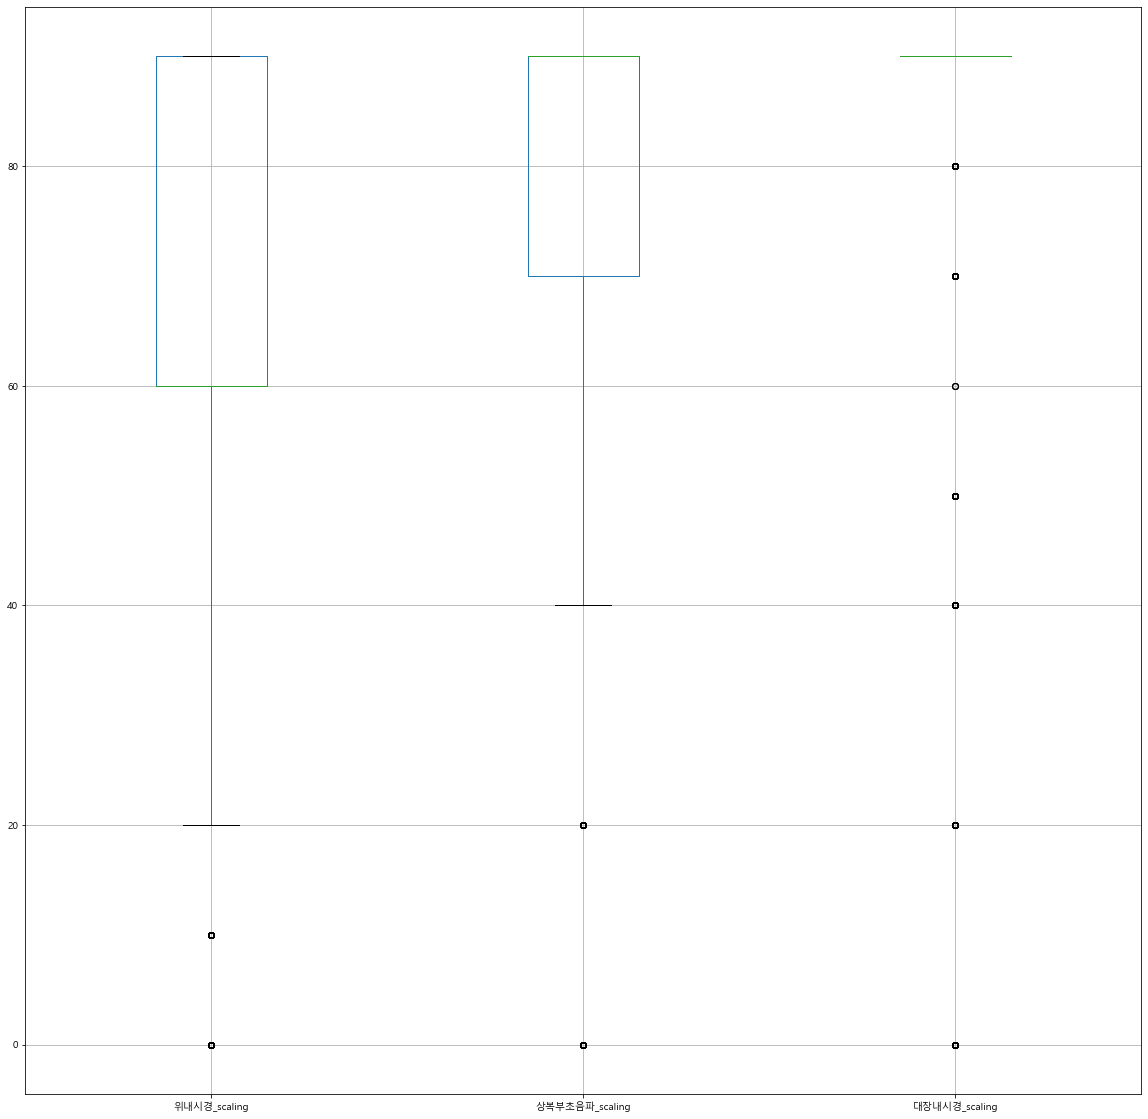

In [335]:
plt.rcParams["figure.figsize"] = (20, 20)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

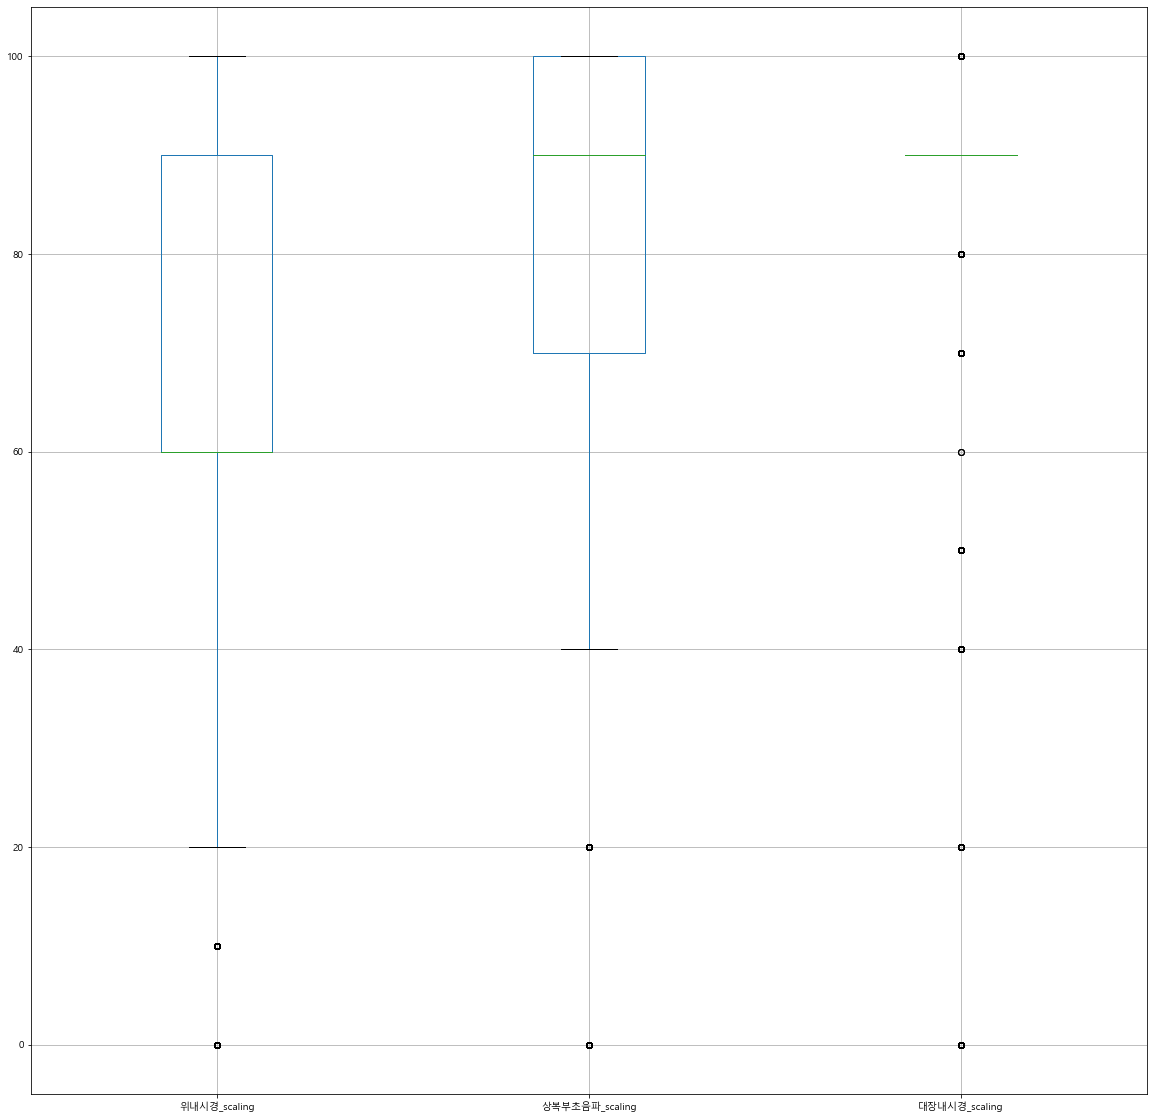

In [336]:
plt.rcParams["figure.figsize"] = (20, 20)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [337]:
df_target['kde_mean'].min()

20.0

In [338]:
df_target['kde_mean'].max()

100.0

In [339]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [340]:
df_target['target'] = (df_target['target'] * 100) + 50

In [341]:
df_target['target'] = df_target['target'].round(0)

In [342]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
23,60.0,14
24,62.0,4
22,63.0,21
20,65.0,80
21,67.0,77
18,68.0,321
19,70.0,130
17,72.0,891
16,73.0,2009
15,75.0,2748


In [343]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.974754e+00,1.518961e+00,1.145571e+00,7.025246e+01,8.481039e+01,8.854429e+01,8.120199e+01,9.064080e+01
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,2.067693e+00,1.468974e+00,1.008726e+00,2.067693e+01,1.468974e+01,1.008726e+01,9.743335e+00,4.910193e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,6.000000e+01
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,7.000000e+01,9.000000e+01,7.333000e+01,8.700000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,4.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,9.000000e+01,9.000000e+01,8.333000e+01,9.200000e+01
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,4.000000e+00,3.000000e+00,1.000000e+00,9.000000e+01,1.000000e+02,9.000000e+01,9.000000e+01,9.500000e+01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


<AxesSubplot:>

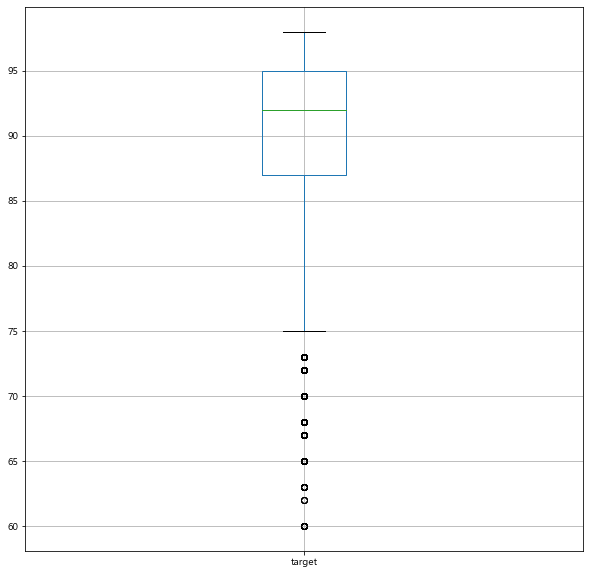

In [344]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

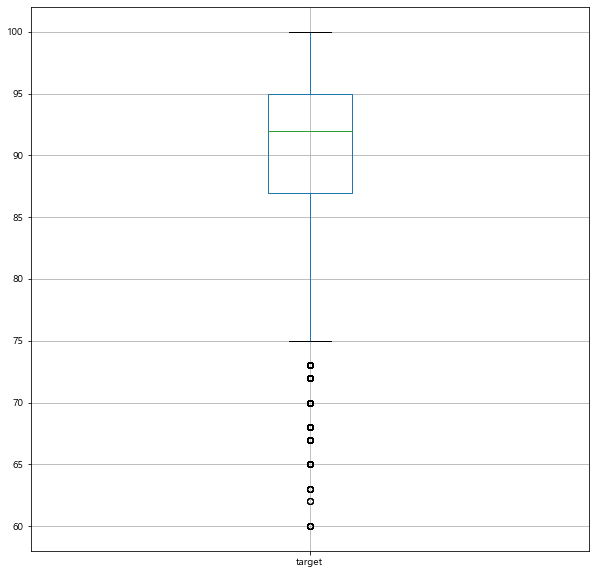

In [345]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

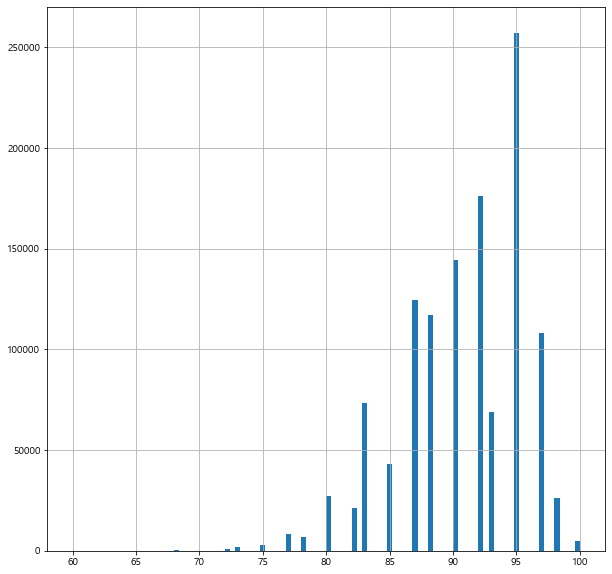

In [346]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

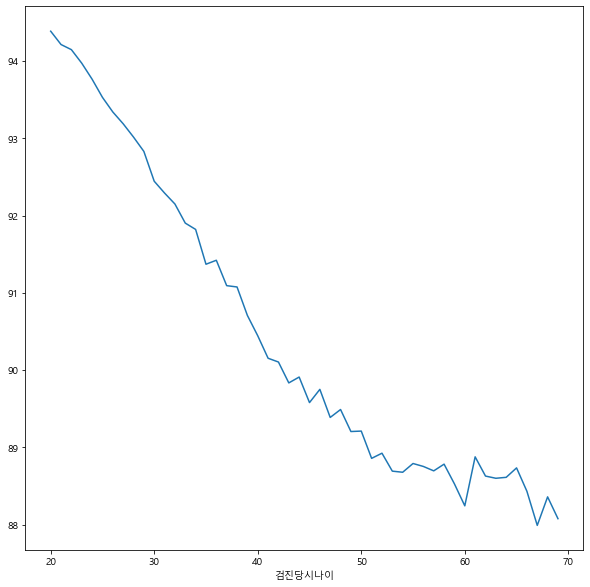

In [347]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

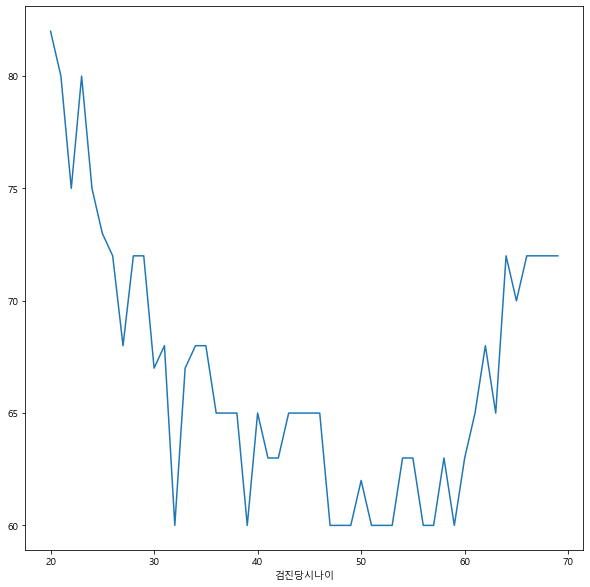

In [348]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

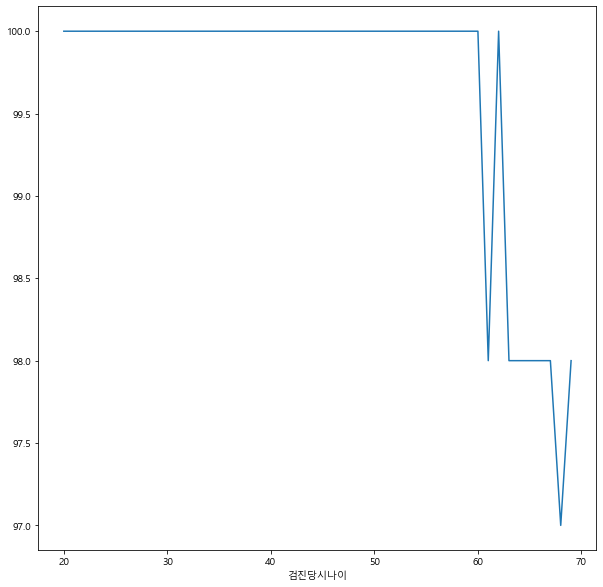

In [349]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [350]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2010,7282,2520,1,42,6.0,2.0,1.0,40.0,80.0,90.0,70.0,85.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
2,2010,7915,3997,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
3,2010,8056,4745,1,42,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
4,2010,8457,3929,1,38,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


# 결측행 제거

In [351]:
# df_result.dropna(axis=0).info()

In [352]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [353]:
df_target['SEX'].value_counts()

1    765459
2    448440
Name: SEX, dtype: int64

In [354]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

765459

In [355]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2010,7282,2520,1,42,6.0,2.0,1.0,40.0,80.0,90.0,70.0,85.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
2,2010,7915,3997,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
3,2010,8056,4745,1,42,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
4,2010,8457,3929,1,38,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


# 결측치 처리

## 결측치 삭제

In [356]:
# df_man.dropna(inplace=True)

In [357]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2010,7282,2520,1,42,6.0,2.0,1.0,40.0,80.0,90.0,70.0,85.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
2,2010,7915,3997,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
3,2010,8056,4745,1,42,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
4,2010,8457,3929,1,38,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


## 결측치 평균으로 대체

In [358]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [359]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [360]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [361]:
len(df_man)

765459

In [362]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [363]:
len(df_man)

765459

In [364]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2010,7282,2520,1,42,6.0,2.0,1.0,40.0,80.0,90.0,70.0,85.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
2,2010,7915,3997,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
3,2010,8056,4745,1,42,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
4,2010,8457,3929,1,38,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


## fillna

In [365]:
df_man.mean().round(2)

검진년도                 2021.91
UID                514677.07
CU_REC_ID         1496169.59
SEX                     1.00
검진당시나이                 42.03
위내시경                    3.09
상복부초음파                  1.72
대장내시경                   1.19
위내시경_scaling           69.08
상복부초음파_scaling         82.81
대장내시경_scaling          88.11
kde_mean               80.00
target                 90.04
dtype: float64

In [366]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [367]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [368]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [369]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [370]:
len(df_man)

765459

In [371]:
len(df_man)

765459

In [372]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [373]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
966,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
21323,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
261100,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0
21325,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0
139208,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0
261105,2021,62,699357,1,42,0.0,3.0,1.0,100.0,70.0,90.0,86.67,93.0
419138,2022,62,1356310,1,43,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
691584,2023,62,2170394,1,44,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
21326,2019,67,410099,1,51,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
139209,2020,67,481109,1,52,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0


In [374]:
len(df_man)

765459

In [375]:
df_man[target_cols]

,위내시경,상복부초음파,대장내시경
966,1.0,1.0,1.0
21323,1.0,3.0,1.0
261100,6.0,5.0,0.0
21325,0.0,3.0,0.0
139208,4.0,3.0,0.0
...,...,...,...
814882,4.0,0.0,1.0
814859,1.0,1.0,1.0
814886,4.0,3.0,1.0
814887,6.0,1.0,1.0


## first만 남겨두고 중복 제거

In [376]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [377]:
len(df_man)

647799

In [378]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
966,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
21323,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
261100,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0
21325,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0
139208,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0
261105,2021,62,699357,1,42,0.0,3.0,1.0,100.0,70.0,90.0,86.67,93.0
419138,2022,62,1356310,1,43,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
691584,2023,62,2170394,1,44,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
21326,2019,67,410099,1,51,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
139209,2020,67,481109,1,52,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0


In [379]:
df_man.reset_index(drop=True, inplace=True)

In [380]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
1,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
2,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0
3,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0
4,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0


In [381]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647799 entries, 0 to 647798
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            647799 non-null  int32  
 1   UID             647799 non-null  int64  
 2   CU_REC_ID       647799 non-null  int64  
 3   SEX             647799 non-null  int64  
 4   검진당시나이          647799 non-null  int64  
 5   위내시경            647799 non-null  float64
 6   상복부초음파          647799 non-null  float64
 7   대장내시경           647799 non-null  float64
 8   위내시경_scaling    647799 non-null  float64
 9   상복부초음파_scaling  647799 non-null  float64
 10  대장내시경_scaling   647799 non-null  float64
 11  kde_mean        647799 non-null  float64
 12  target          647799 non-null  float64
dtypes: float64(8), int32(1), int64(4)
memory usage: 61.8 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

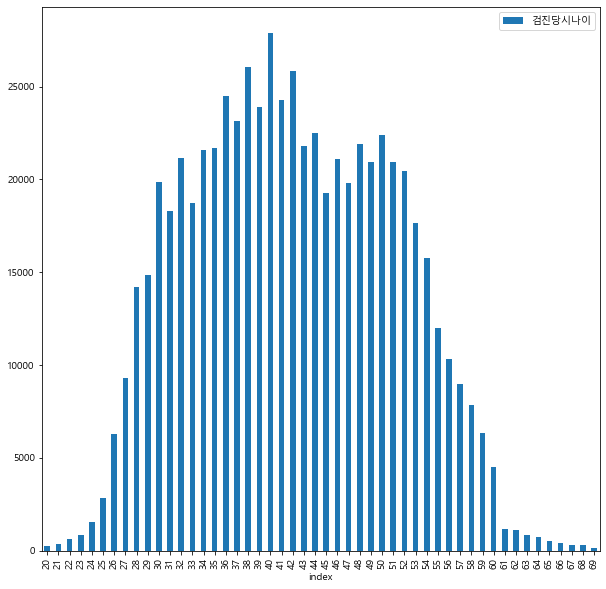

In [382]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [383]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,246
45,21,338
42,22,615
39,23,825
36,24,1539
35,25,2818
33,26,6301
29,27,9279
26,28,14224
25,29,14826


# 검진항목 시각화

In [384]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
count,647799.000000,6.477990e+05,6.477990e+05,647799.0,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000
mean,2021.851082,5.103385e+05,1.491469e+06,1.0,41.996622,3.059971,1.695500,1.184968,69.400292,83.045003,88.150321,80.198147,90.138486
std,1.759744,3.646793e+05,8.090123e+05,0.0,8.867960,2.092861,1.474167,1.096483,20.928612,14.741674,10.964826,9.972189,5.023843
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,60.000000
25%,2021.000000,2.224965e+05,6.594805e+05,1.0,35.000000,1.000000,1.000000,1.000000,60.000000,70.000000,90.000000,73.330000,87.000000
50%,2022.000000,3.816920e+05,1.409644e+06,1.0,42.000000,4.000000,1.000000,1.000000,60.000000,90.000000,90.000000,80.000000,90.000000
75%,2023.000000,8.388380e+05,2.190277e+06,1.0,49.000000,4.000000,3.000000,1.000000,90.000000,90.000000,90.000000,90.000000,95.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,10.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='검진당시나이'>

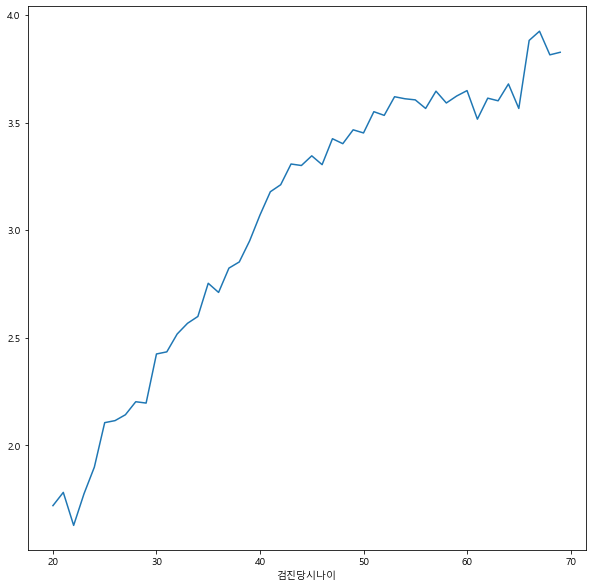

In [385]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

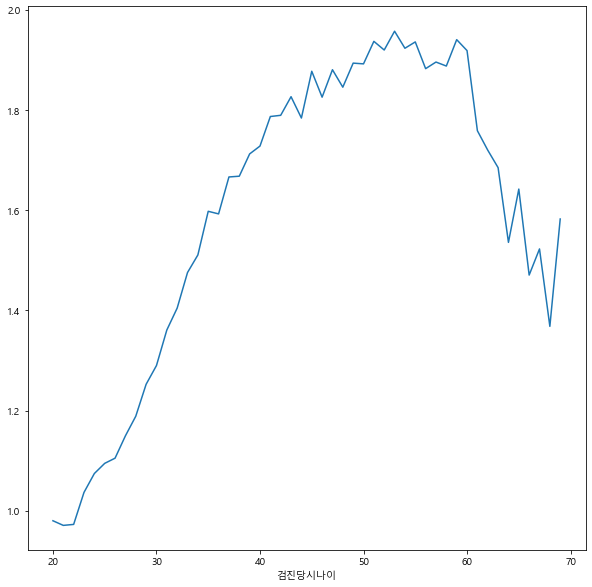

In [386]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

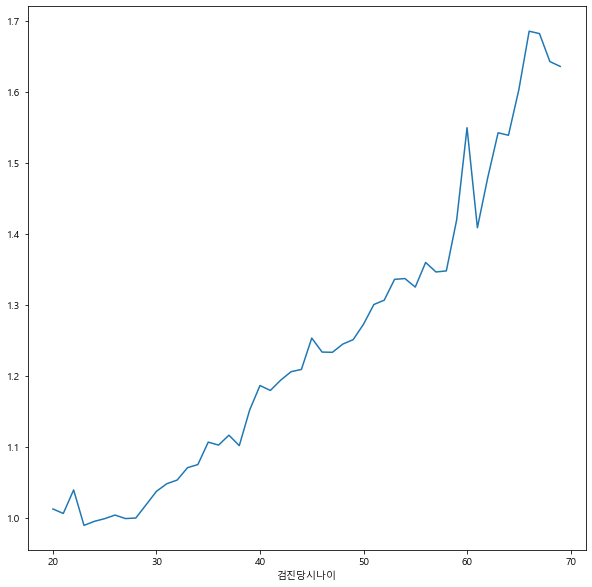

In [387]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

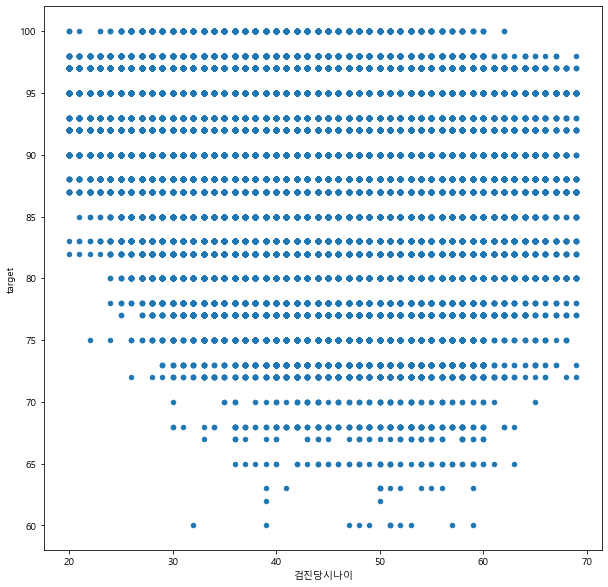

In [388]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

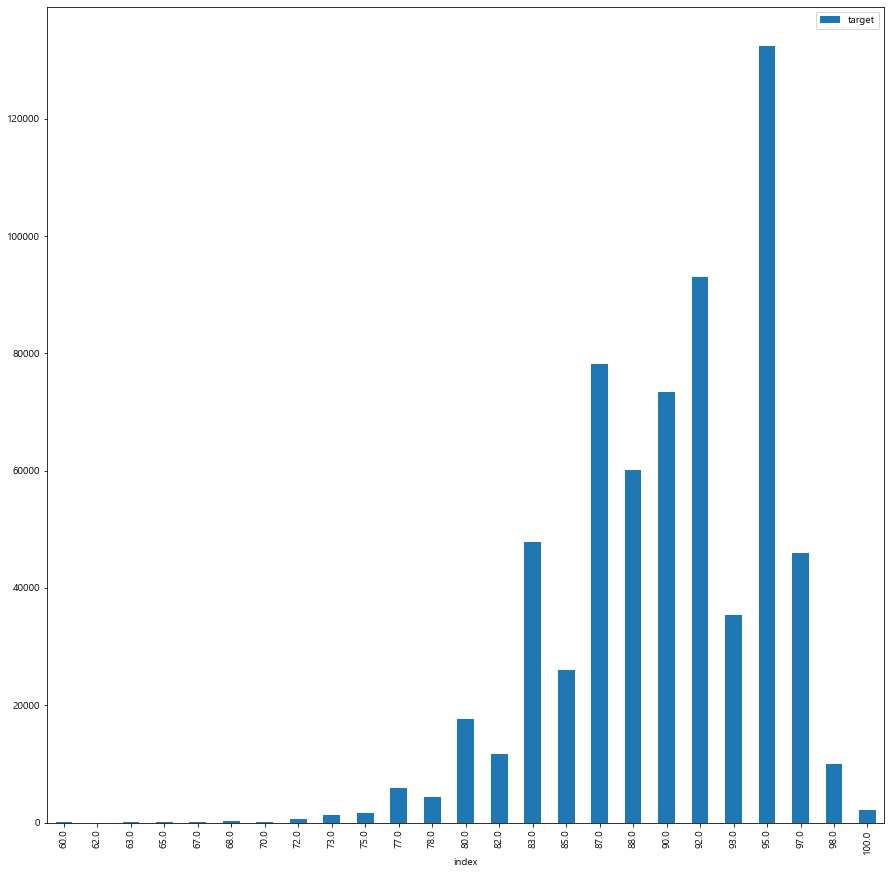

In [389]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [390]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
22,60.0,12
24,62.0,2
23,63.0,12
20,65.0,58
21,67.0,48
18,68.0,218
19,70.0,90
17,72.0,621
16,73.0,1339
15,75.0,1687


In [391]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [392]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

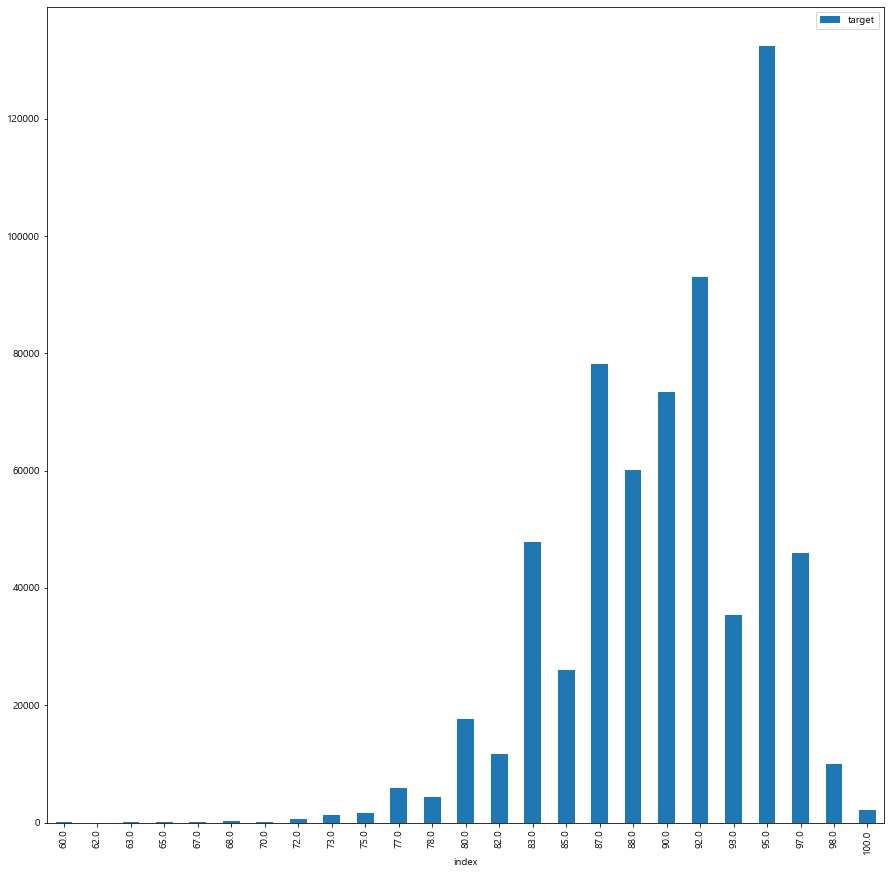

In [393]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [394]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
23,60.0,12
24,62.0,2
22,63.0,12
20,65.0,58
21,67.0,48
18,68.0,218
19,70.0,90
17,72.0,621
16,73.0,1339
15,75.0,1687


# 나이별 확인하기

In [395]:
# target = 'target'

In [396]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [397]:
# df_man = df_man_sample

In [398]:
# int(df_man['검진당시나이'].value_counts().mean())

In [399]:
# df_man['검진당시나이'].min()

In [400]:
# df_man['검진당시나이'].max()

In [401]:
# df_man.columns

In [402]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [403]:
# df_temp.info()

In [404]:
# df_temp.reset_index(drop=True, inplace=True)

In [405]:
# df_man = df_temp.copy()

In [406]:
# df_man['검진당시나이'].value_counts()

In [407]:
# df_man[df_man['검진당시나이']==38]

In [408]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [409]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경', '상복부초음파', '대장내시경',
       '위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling', 'kde_mean',
       'target'],
      dtype='object')

In [410]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [411]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [412]:
train_columns = target_cols.copy()

In [413]:
train_columns.insert(0, '검진당시나이')

In [414]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [415]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [416]:
target_col = 'target'

## Min Max Scaling

In [417]:
from sklearn.preprocessing import MinMaxScaler

In [418]:
scaling_bool

False

In [419]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [420]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [421]:
# model = LinearRegression()

In [422]:
# model.fit(X_train, y_train)

In [423]:
# model.intercept_

In [424]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [425]:
model = XGBRegressor()

In [426]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [427]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [428]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 1278.77 seconds for 10 candidates parameter settings.


In [429]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [430]:
# best score
random_search.best_score_

-0.00018410287381816605

In [431]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [432]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [433]:
# model = build_model()

In [434]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [435]:
# model.summary()

In [436]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [437]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [438]:
# plot_history(history)

## pyTorch 신경망

In [439]:
np.shape(X_train)[1]

4

In [440]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [441]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [442]:
# epochs = 1000

In [443]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [444]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [445]:
# plt.plot(losses)

## coef 계산

In [446]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [447]:
# df_coef.columns = ['검사항목', 'coef']

In [448]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [449]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [450]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [451]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [452]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [453]:
# slr = LinearRegression()

In [454]:
# slr.fit(X_train_poly, y_train)

In [455]:
# np.shape(X_train)

In [456]:
# np.shape(X_train_poly)

In [457]:
# np.shape(X_test)

In [458]:
# np.shape(X_test_poly)

In [459]:
# y_pred_poly = slr.predict(X_test_poly)

In [460]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [461]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [462]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [463]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [464]:
pyTorch_bool

False

In [465]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [466]:
XGB_bool

True

In [467]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [468]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.00046098716761750104
MSE : 9.492175352088483e-05
RMSE : 0.009742779558261843


In [469]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999996242730911

In [470]:
model.score(X_test, y_test)

0.999996242730911

## feature importance

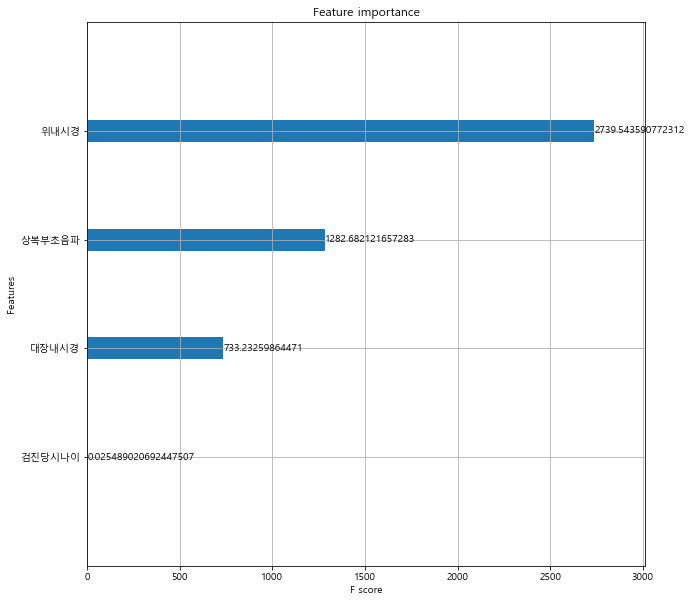

In [471]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [472]:
model.feature_importances_

array([5.3599215e-06, 5.7608098e-01, 2.6972693e-01, 1.5418676e-01],
      dtype=float32)

In [473]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [474]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,위내시경,0.576081
2,상복부초음파,0.269727
3,대장내시경,0.154187
0,검진당시나이,0.000005


# 실제지수 - 예측지수 결과

In [475]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,95.0
1,92.0
2,87.0
3,88.0
4,83.0
...,...
161945,82.0
161946,92.0
161947,83.0
161948,92.0


In [476]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,95.000107
1,91.999985
2,86.999878
3,87.998817
4,82.999962
...,...
161945,81.999100
161946,92.000053
161947,82.999939
161948,92.000183


In [477]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [478]:
df_test.head()

,target,0
0,95.0,95.000107
1,92.0,91.999985
2,87.0,86.999878
3,88.0,87.998817
4,83.0,82.999962


In [479]:
df_test.columns

Index(['target', 0], dtype='object')

In [480]:
df_test.columns = ['실제지수', '예측지수']

In [481]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [482]:
df_test.head()

,실제지수,예측지수,diff
0,95.0,95.000107,0.000107
1,92.0,91.999985,-0.000015
2,87.0,86.999878,-0.000122
3,88.0,87.998817,-0.001183
4,83.0,82.999962,-0.000038


In [483]:
df_test['diff_int'] = df_test['diff'].round(0)

In [484]:
len(df_test)

161950

In [485]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,95.0,95.000107,0.000107,0.0
1,92.0,91.999985,-0.000015,-0.0
2,87.0,86.999878,-0.000122,-0.0
3,88.0,87.998817,-0.001183,-0.0
4,83.0,82.999962,-0.000038,-0.0


<AxesSubplot:>

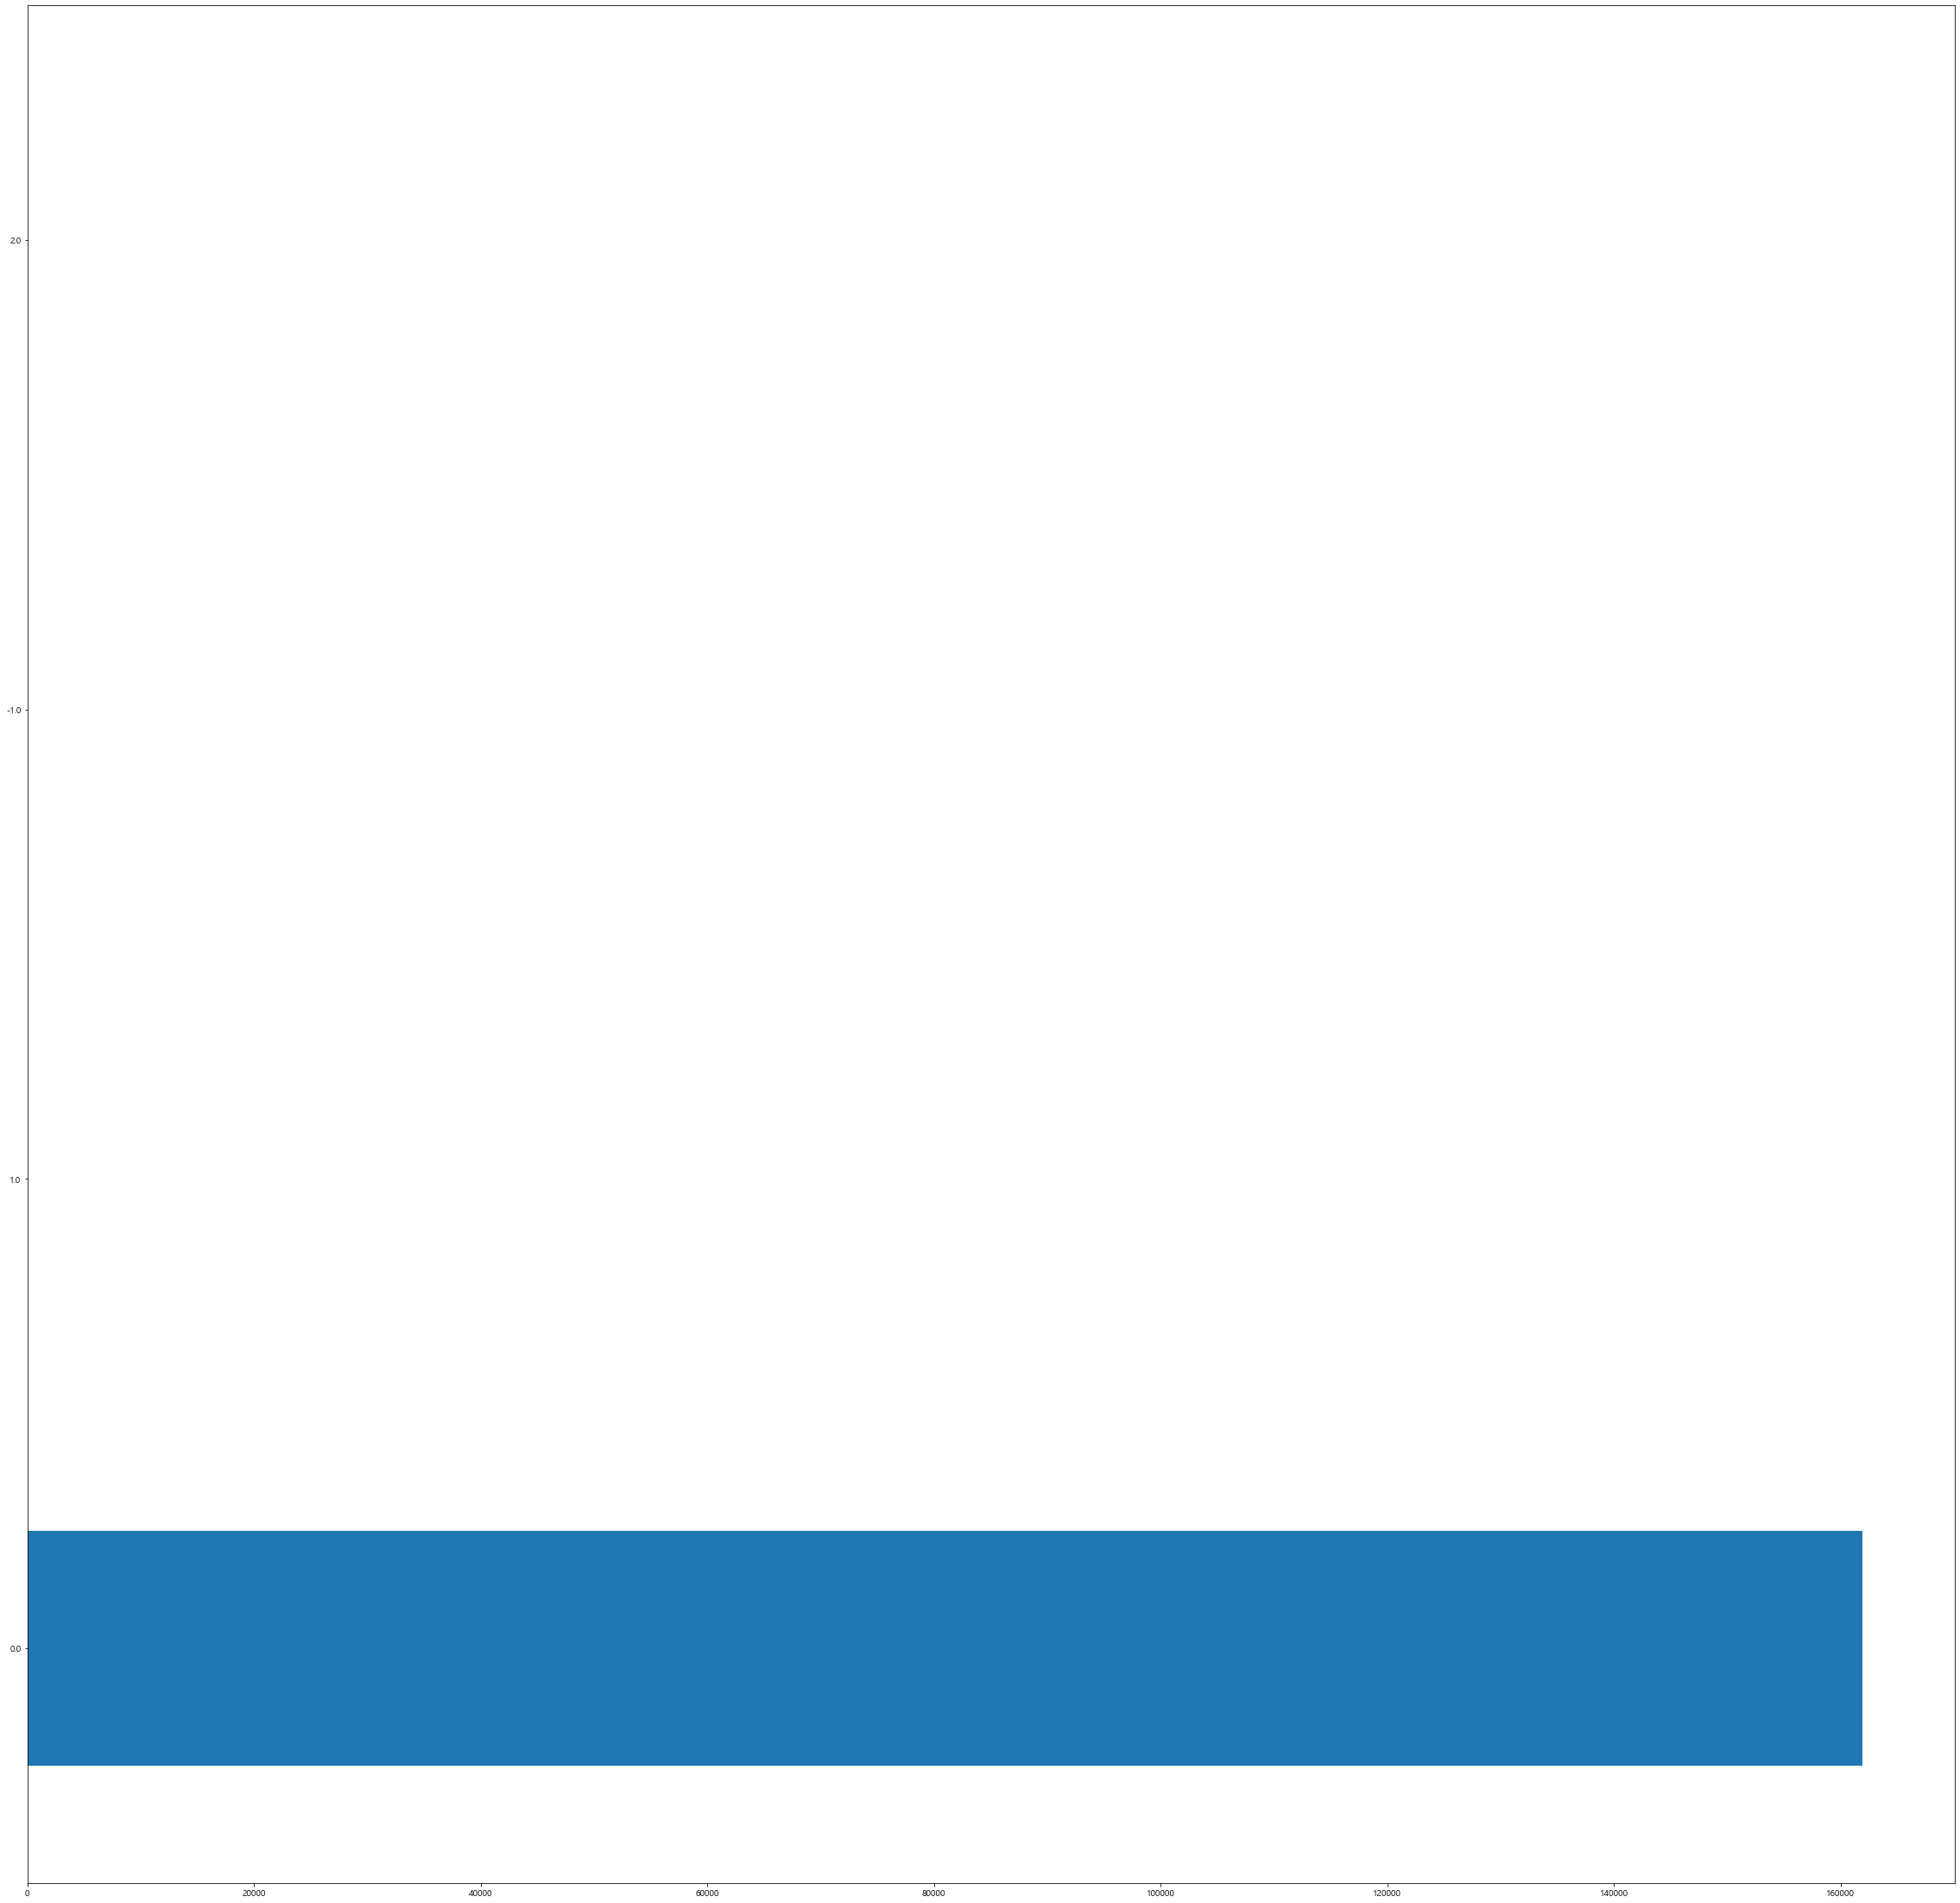

In [486]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [487]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    161937
 1.0         7
-1.0         5
 2.0         1
Name: diff_int, dtype: int64

In [488]:
df_test['예측지수'].round(0).value_counts()

95.0     32958
92.0     23385
87.0     19429
90.0     18367
88.0     14946
83.0     11977
97.0     11405
93.0      8965
85.0      6517
80.0      4505
82.0      2925
98.0      2448
77.0      1514
78.0      1041
100.0      551
75.0       417
73.0       323
72.0       162
68.0        60
70.0        15
65.0        13
67.0        11
60.0         3
66.0         3
76.0         2
79.0         2
62.0         2
63.0         2
69.0         1
81.0         1
Name: 예측지수, dtype: int64

# 예측 나이 분포

In [489]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [490]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [491]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [492]:
df_plot = pd.DataFrame(y_test.value_counts())

In [493]:
df_plot.columns = ['count']

In [494]:
df_plot.reset_index(inplace=True)

In [495]:
df_plot = df_plot.sort_values('index', ascending=True)

In [496]:
df_plot

,index,count
22,60.0,3
23,62.0,2
24,63.0,2
19,65.0,15
21,67.0,12
18,68.0,61
20,70.0,15
17,72.0,163
16,73.0,323
15,75.0,417


In [497]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

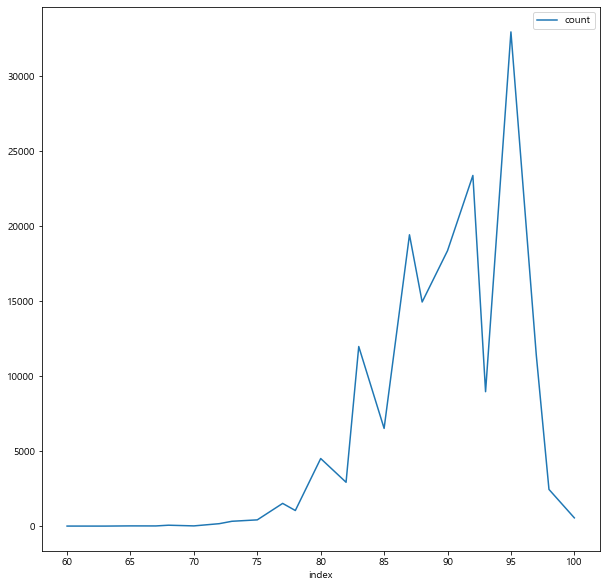

In [498]:
df_plot.plot()

In [499]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [500]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [501]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [502]:
df_plot.columns = ['count']

In [503]:
df_plot.reset_index(inplace=True)

In [504]:
df_plot = df_plot.sort_values(0, ascending=True)

In [505]:
df_plot.set_index(0, inplace=True)

In [506]:
df_plot

,count
0,
60.0,3
62.0,2
63.0,2
65.0,13
66.0,3
67.0,11
68.0,60
69.0,1
70.0,15


<AxesSubplot:xlabel='0'>

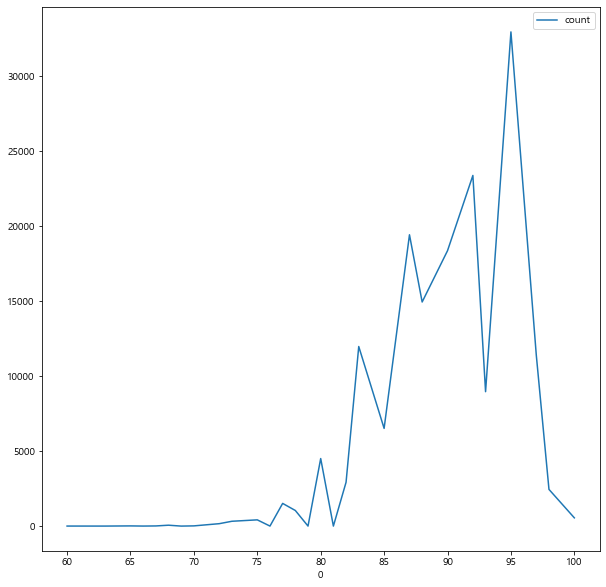

In [507]:
df_plot.plot()

# 시각화

In [508]:
# model.coef_

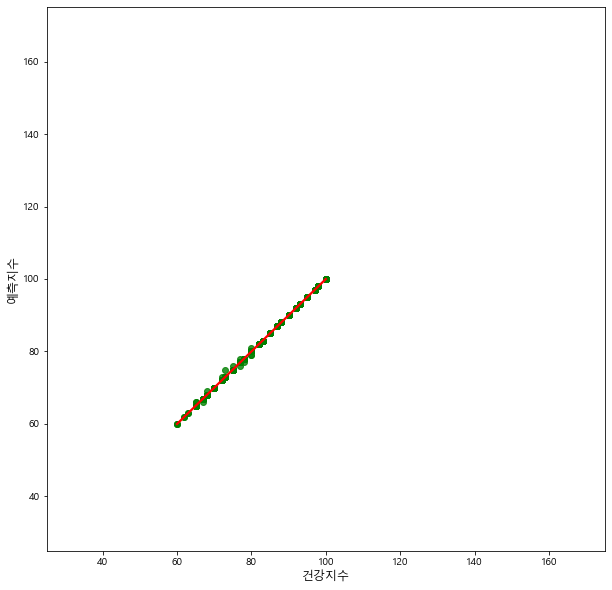

In [509]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [510]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
1,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0
2,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0
3,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0
4,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0


In [511]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647799 entries, 0 to 647798
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            647799 non-null  int32  
 1   UID             647799 non-null  int64  
 2   CU_REC_ID       647799 non-null  int64  
 3   SEX             647799 non-null  int64  
 4   검진당시나이          647799 non-null  int64  
 5   위내시경            647799 non-null  float64
 6   상복부초음파          647799 non-null  float64
 7   대장내시경           647799 non-null  float64
 8   위내시경_scaling    647799 non-null  float64
 9   상복부초음파_scaling  647799 non-null  float64
 10  대장내시경_scaling   647799 non-null  float64
 11  kde_mean        647799 non-null  float64
 12  target          647799 non-null  float64
dtypes: float64(8), int32(1), int64(4)
memory usage: 61.8 MB


In [512]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
100189,2022,168996,2259500,1,35,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
100190,2023,168996,2259499,1,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
100191,2024,168996,2281994,1,37,6.0,1.0,5.0,40.0,90.0,50.0,60.0,80.0


In [513]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [514]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [515]:
len(df_pred)

647799

In [516]:
df_pred.reset_index(drop=True, inplace=True)

In [517]:
X_test

,검진당시나이,위내시경,상복부초음파,대장내시경
442839,37,2.0,0.0,1.0
366947,46,1.0,3.0,1.0
336645,51,6.0,1.0,1.0
302027,36,4.0,2.0,1.0
281833,46,6.0,3.0,1.0
...,...,...,...,...
187304,45,4.0,6.0,1.0
525962,49,4.0,0.0,1.0
634071,35,6.0,3.0,1.0
604811,52,4.0,1.0,0.0


In [518]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경', '상복부초음파', '대장내시경',
       '위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling', 'kde_mean',
       'target'],
      dtype='object')

In [519]:
df_pred[train_columns]

,검진당시나이,위내시경,상복부초음파,대장내시경
0,24,1.0,1.0,1.0
1,53,1.0,3.0,1.0
2,55,6.0,5.0,0.0
3,40,0.0,3.0,0.0
4,41,4.0,3.0,0.0
...,...,...,...,...
647794,29,4.0,0.0,1.0
647795,39,1.0,1.0,1.0
647796,26,4.0,3.0,1.0
647797,53,6.0,1.0,1.0


In [520]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [521]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [522]:
pred_data = pred_data.round(0)

In [523]:
pred_data

array([95., 92., 82., ..., 87., 87., 95.], dtype=float32)

In [524]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [525]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [526]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수
0,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0
1,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0
2,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0,82.0
3,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0,95.0
4,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0,88.0
5,2021,62,699357,1,42,0.0,3.0,1.0,100.0,70.0,90.0,86.67,93.0,93.0
6,2022,62,1356310,1,43,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0
7,2023,62,2170394,1,44,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0
8,2019,67,410099,1,51,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0
9,2020,67,481109,1,52,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0


## 예측지수 성능평가

In [527]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.00012040771906100504

# target으로 나이 계산

In [528]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [529]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0,25.0
1,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0,54.6
2,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0,82.0,58.6
3,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0,95.0,41.0
4,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0,88.0,43.4
5,2021,62,699357,1,42,0.0,3.0,1.0,100.0,70.0,90.0,86.67,93.0,93.0,43.4
6,2022,62,1356310,1,43,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0,44.6
7,2023,62,2170394,1,44,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0,45.6
8,2019,67,410099,1,51,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0,52.0
9,2020,67,481109,1,52,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0,53.0


## 예측나이 성능평가

In [530]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.9723046809272622

# 최종 산출

In [531]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.0,25.0
1,2019,50,356493,1,53,1.0,3.0,1.0,90.0,70.0,90.0,83.33,92.0,92.0,54.6
2,2021,50,642497,1,55,6.0,5.0,0.0,40.0,50.0,100.0,63.33,82.0,82.0,58.6
3,2019,62,421626,1,40,0.0,3.0,0.0,100.0,70.0,100.0,90.00,95.0,95.0,41.0
4,2020,62,565527,1,41,4.0,3.0,0.0,60.0,70.0,100.0,76.67,88.0,88.0,43.4


# DataMart csv

In [532]:
df_copy = df.copy()

In [533]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경 (Endo)_text,위내시경,상복부초음파 (Abdominal Sono)_text,상복부초음파,대장내시경_text,대장내시경
0,2010,7282,2520,1,42,위축성위염,6.0,간혈관종의심,2.0,None,NaN
1,2010,7490,3638,1,39,"역류성식도염,홍반성위염",4.0,None,NaN,None,NaN
2,2010,7915,3997,1,36,None,NaN,None,NaN,None,NaN
3,2010,8056,4745,1,42,전립선비대증,NaN,None,NaN,None,NaN
4,2010,8457,3929,1,38,None,NaN,None,NaN,None,NaN


In [534]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   위내시경 (Endo)_text              817030 non-null   object 
 6   위내시경                          782071 non-null   float64
 7   상복부초음파 (Abdominal Sono)_text  780855 non-null   object 
 8   상복부초음파                        763819 non-null   float64
 9   대장내시경_text                    189844 non-null   object 
 10  대장내시경                         183662 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 97.2+ MB


In [535]:
minimums

[0, 0, 0]

In [536]:
maximums

[10, 10, 10]

In [537]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [538]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [539]:
type(target_cols)

list

In [541]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [542]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [543]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경 (Endo)_text,위내시경,상복부초음파 (Abdominal Sono)_text,상복부초음파,대장내시경_text,대장내시경
0,2010,7282,2520,1,42,위축성위염,6.0,간혈관종의심,2.0,None,NaN
1,2010,7490,3638,1,39,"역류성식도염,홍반성위염",4.0,None,NaN,None,NaN
2,2010,7915,3997,1,36,None,NaN,None,NaN,None,NaN
3,2010,8056,4745,1,42,전립선비대증,NaN,None,NaN,None,NaN
4,2010,8457,3929,1,38,None,NaN,None,NaN,None,NaN


## 검진 항목 all 결측치 지우기

In [544]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [545]:
df_man_csv.dropna(subset=target_cols_temp, how='all', inplace=True)

In [546]:
df_man_csv.reset_index(drop=True, inplace=True)

In [547]:
len(df_man_csv)

639185

## fillna

In [548]:
df_man_csv.isnull().sum()

검진년도                                 0
UID                                  0
CU_REC_ID                            0
SEX                                  0
검진당시나이                               0
위내시경 (Endo)_text                120659
위내시경                            137520
상복부초음파 (Abdominal Sono)_text    142999
상복부초음파                          149708
대장내시경_text                      503428
대장내시경                           506917
dtype: int64

In [549]:
df_man_csv[score_text_real].fillna(fill_th, inplace=True)
df_man_csv[score_text_real2].fillna(fill_th, inplace=True)
df_man_csv[score_text_real3].fillna(fill_th, inplace=True)

In [550]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [558]:
# screening = 80

In [559]:
# scr_col = '수축기 혈압'

In [560]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [561]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [562]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [563]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [564]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

## 컬럼 순서 변경

In [565]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        score_text_real, score_text_real2, score_text_real3,  
       ]

df_man_csv = df_man_csv[cols_temp]

## 모델 예측

In [566]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [567]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [568]:
pred_data = pred_data.round(0)

In [569]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [570]:
df_man_csv.head(200)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수
0,2010,7282,2520,1,42,6.0,2.0,1.0,85.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,90.0
2,2010,8634,4751,1,43,2.0,1.0,1.0,93.0
3,2010,11158,1703,1,37,4.0,1.0,1.0,90.0
4,2010,13999,3816,1,53,4.0,1.0,1.0,90.0
5,2011,135154,6627,1,28,1.0,0.0,1.0,97.0
6,2010,16844,4411,1,37,1.0,3.0,0.0,93.0
7,2010,34284,577,1,44,4.0,1.0,1.0,90.0
8,2010,37377,3980,1,47,5.0,1.0,1.0,88.0
9,2010,38529,1634,1,38,4.0,1.0,1.0,90.0


### 성능 평가

In [571]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [572]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [573]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [574]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.1881054780697293


In [575]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9246089248840904

In [576]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
0,2010,7282,2520,1,42,6.0,2.0,1.0,85.0,45.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,90.0,41.0
2,2010,8634,4751,1,43,2.0,1.0,1.0,93.0,44.4
3,2010,11158,1703,1,37,4.0,1.0,1.0,90.0,39.0
4,2010,13999,3816,1,53,4.0,1.0,1.0,90.0,55.0


In [577]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639185 entries, 0 to 639184
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       639185 non-null  int32  
 1   UID        639185 non-null  int64  
 2   CU_REC_ID  639185 non-null  int64  
 3   SEX        639185 non-null  int64  
 4   검진당시나이     639185 non-null  int64  
 5   위내시경       639185 non-null  float64
 6   상복부초음파     639185 non-null  float64
 7   대장내시경      639185 non-null  float64
 8   예측지수       639185 non-null  float32
 9   예측나이       639185 non-null  float64
dtypes: float32(1), float64(4), int32(1), int64(4)
memory usage: 43.9 MB


# 최종 UID별 확인

In [578]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
224577,2022,175673,751348,1,48,6.0,1.0,1.0,87.0,50.6
224578,2022,175673,1463838,1,48,6.0,1.0,1.0,87.0,50.6
224517,2022,175673,1919125,1,48,6.0,1.0,1.0,87.0,50.6
224579,2022,175673,2169120,1,48,6.0,1.0,1.0,87.0,50.6
224518,2022,175673,2223795,1,48,6.0,1.0,1.0,87.0,50.6
224519,2022,175673,2237465,1,48,6.0,1.0,1.0,87.0,50.6
224580,2022,175673,2238320,1,48,6.0,1.0,1.0,87.0,50.6
224581,2022,175673,2246042,1,48,6.0,1.0,1.0,87.0,50.6
372443,2023,175673,1463893,1,49,6.0,1.0,1.0,87.0,51.6
372439,2023,175673,1919126,1,49,6.0,1.0,1.0,87.0,51.6


In [579]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
158466,2021,289587,796178,1,47,4.0,1.0,1.0,90.0,49.0
253372,2022,289587,866076,1,48,4.0,1.0,1.0,90.0,50.0
253328,2022,289587,2115999,1,48,4.0,1.0,1.0,90.0,50.0
77867,2022,289587,2603574,1,48,4.0,1.0,1.0,90.0,50.0
416915,2023,289587,1487447,1,49,6.0,1.0,1.0,87.0,51.6
416916,2023,289587,2227964,1,49,6.0,1.0,1.0,87.0,51.6
580834,2024,289587,2243723,1,50,6.0,1.0,1.0,87.0,52.6
580814,2024,289587,2603575,1,50,6.0,1.0,1.0,87.0,52.6


In [580]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
345299,2022,897603,1066133,1,51,5.0,1.0,1.0,88.0,53.4
345310,2022,897603,1068885,1,51,5.0,1.0,1.0,88.0,53.4
345311,2022,897603,1728532,1,51,5.0,1.0,1.0,88.0,53.4
345312,2022,897603,2555144,1,51,5.0,1.0,1.0,88.0,53.4
500216,2023,897603,1458387,1,52,5.0,1.0,1.0,88.0,54.4
500217,2023,897603,1728531,1,52,5.0,1.0,1.0,88.0,54.4
489629,2023,897603,2120063,1,52,5.0,1.0,1.0,88.0,54.4
489630,2023,897603,2351665,1,52,5.0,1.0,1.0,88.0,54.4
500218,2023,897603,2555143,1,52,5.0,1.0,1.0,88.0,54.4
489631,2023,897603,2622260,1,52,5.0,1.0,1.0,88.0,54.4


In [581]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
210201,2022,119172,751336,1,41,4.0,1.0,1.0,90.0,43.0
210202,2022,119172,1432355,1,41,4.0,1.0,1.0,90.0,43.0
210199,2022,119172,1432476,1,41,4.0,1.0,1.0,90.0,43.0
210203,2022,119172,2247083,1,41,4.0,1.0,1.0,90.0,43.0
210204,2022,119172,2252956,1,41,4.0,1.0,1.0,90.0,43.0
359595,2023,119172,1436742,1,42,4.0,1.0,1.0,90.0,44.0
359596,2023,119172,2247082,1,42,4.0,1.0,1.0,90.0,44.0
359597,2023,119172,2252955,1,42,4.0,1.0,1.0,90.0,44.0
563969,2024,119172,2250063,1,43,6.0,1.0,1.0,87.0,45.6
563970,2024,119172,2252954,1,43,6.0,1.0,1.0,87.0,45.6


In [582]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
500213,2023,897595,1525045,1,40,6.0,1.0,1.0,87.0,42.6
500214,2023,897595,1593851,1,40,6.0,1.0,1.0,87.0,42.6
500211,2023,897595,2005289,1,40,6.0,1.0,1.0,87.0,42.6
500212,2023,897595,2138998,1,40,6.0,1.0,1.0,87.0,42.6
485491,2023,897595,2320478,1,40,6.0,1.0,1.0,87.0,42.6
500215,2023,897595,2328772,1,40,6.0,1.0,1.0,87.0,42.6
619345,2024,897595,2329051,1,41,6.0,1.0,1.0,87.0,43.6


In [583]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
298155,2022,492764,909688,1,39,4.0,1.0,1.0,90.0,41.0
298156,2022,492764,1575802,1,39,4.0,1.0,1.0,90.0,41.0
298159,2022,492764,1668547,1,39,4.0,1.0,1.0,90.0,41.0
298157,2022,492764,2246777,1,39,4.0,1.0,1.0,90.0,41.0
298158,2022,492764,2330256,1,39,4.0,1.0,1.0,90.0,41.0
117111,2022,492764,2343199,1,39,4.0,1.0,1.0,90.0,41.0
132299,2022,492764,2363393,1,39,4.0,1.0,1.0,90.0,41.0
132300,2022,492764,2639564,1,39,4.0,1.0,1.0,90.0,41.0
132301,2022,492764,2703924,1,39,4.0,1.0,1.0,90.0,41.0
298160,2022,492764,2783328,1,39,4.0,1.0,1.0,90.0,41.0


In [584]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
504026,2023,933936,1431742,1,40,6.0,1.0,5.0,80.0,44.0
504027,2023,933936,1435266,1,40,6.0,1.0,5.0,80.0,44.0
620530,2024,933936,2242997,1,41,5.0,1.0,1.0,88.0,43.4


In [585]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
222290,2022,168996,919754,1,35,4.0,1.0,1.0,90.0,37.0
222291,2022,168996,1425925,1,35,4.0,1.0,1.0,90.0,37.0
222292,2022,168996,2259500,1,35,4.0,1.0,1.0,90.0,37.0
568751,2024,168996,2281994,1,37,6.0,1.0,5.0,80.0,41.0


# 여성 모델

In [586]:
df_target['SEX'].value_counts()

1    765459
2    448440
Name: SEX, dtype: int64

In [587]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

448440

# 결측치 처리

## 결측치 삭제

In [588]:
# df_woman.dropna(inplace=True)

In [589]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
10,2010,15894,2533,2,29,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
22,2010,42223,1364,2,24,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
37,2011,364096,6645,2,32,2.0,0.0,1.0,80.0,100.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
63,2011,698706,6600,2,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


## 결측치 평균으로 대체

In [590]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [591]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [592]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [593]:
len(df_woman)

448440

In [594]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [595]:
len(df_woman)

448440

In [596]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
10,2010,15894,2533,2,29,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
22,2010,42223,1364,2,24,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
37,2011,364096,6645,2,32,2.0,0.0,1.0,80.0,100.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
63,2011,698706,6600,2,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


In [597]:
len(df_woman)

448440

## fillna

In [598]:
df_woman.mean().round(2)

검진년도                 2021.84
UID                498433.18
CU_REC_ID         1483001.65
SEX                     2.00
검진당시나이                 38.56
위내시경                    2.77
상복부초음파                  1.18
대장내시경                   1.07
위내시경_scaling           72.25
상복부초음파_scaling         88.22
대장내시경_scaling          89.29
kde_mean               83.25
target                 91.67
dtype: float64

In [599]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [600]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [601]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [602]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [603]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
10,2010,15894,2533,2,29,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
22,2010,42223,1364,2,24,4.0,1.0,1.0,60.0,90.0,90.0,80.0,90.0
37,2011,364096,6645,2,32,2.0,0.0,1.0,80.0,100.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0
63,2011,698706,6600,2,36,1.0,1.0,1.0,90.0,90.0,90.0,90.0,95.0


# 중복 제거

In [604]:
len(df_woman)

448440

In [605]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [606]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
172467,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
385421,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
261102,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0
261101,2021,53,664316,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0
385422,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
1078542,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0
139207,2020,54,497669,2,30,1.0,0.0,5.0,90.0,100.0,50.0,80.00,90.0
419134,2022,54,1319859,2,32,0.0,0.0,1.0,100.0,100.0,90.0,96.67,98.0
691582,2023,54,2039511,2,33,4.0,0.0,1.0,60.0,100.0,90.0,83.33,92.0
1078543,2024,54,2750990,2,34,2.0,0.0,5.0,80.0,100.0,50.0,76.67,88.0


## first만 남겨두고 중복 제거

In [607]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [608]:
df_woman.reset_index(drop=True, inplace=True)

In [609]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
1,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
2,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0
3,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
4,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0
5,2020,54,497669,2,30,1.0,0.0,5.0,90.0,100.0,50.0,80.00,90.0
6,2022,54,1319859,2,32,0.0,0.0,1.0,100.0,100.0,90.0,96.67,98.0
7,2023,54,2039511,2,33,4.0,0.0,1.0,60.0,100.0,90.0,83.33,92.0
8,2024,54,2750990,2,34,2.0,0.0,5.0,80.0,100.0,50.0,76.67,88.0
9,2019,56,1605927,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

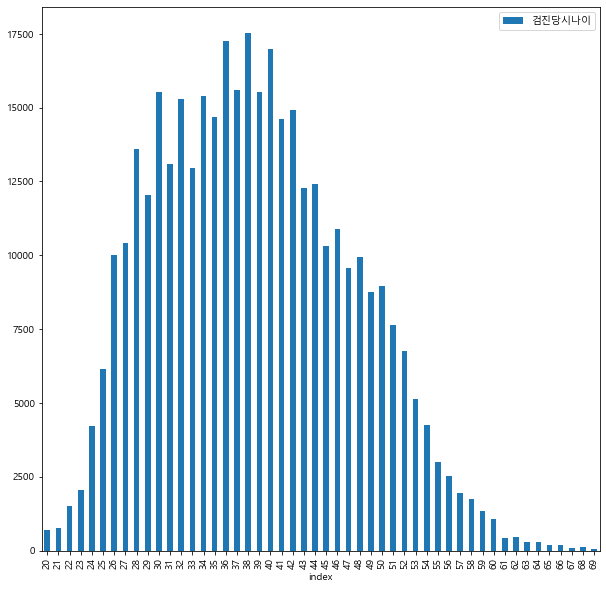

In [610]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [611]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,681
39,21,769
36,22,1521
33,23,2062
30,24,4219
27,25,6146
20,26,10005
18,27,10430
11,28,13597
16,29,12031


# 검진항목 시각화

In [612]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
count,381463.000000,3.814630e+05,3.814630e+05,381463.0,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000
mean,2021.777176,4.935726e+05,1.471011e+06,2.0,38.584156,2.740365,1.161292,1.071352,72.596346,88.387078,89.286484,83.422900,91.751934
std,1.733624,3.650641e+05,8.084615e+05,0.0,8.567008,2.012092,1.372582,0.808239,20.120921,13.725819,8.082387,8.953837,4.515867
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,60.000000
25%,2021.000000,2.154040e+05,6.447885e+05,2.0,32.000000,1.000000,0.000000,1.000000,60.000000,90.000000,90.000000,76.670000,88.000000
50%,2022.000000,3.697130e+05,1.381949e+06,2.0,38.000000,2.000000,1.000000,1.000000,80.000000,90.000000,90.000000,83.330000,92.000000
75%,2023.000000,8.228600e+05,2.169960e+06,2.0,45.000000,4.000000,1.000000,1.000000,90.000000,100.000000,90.000000,90.000000,95.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,10.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='검진당시나이'>

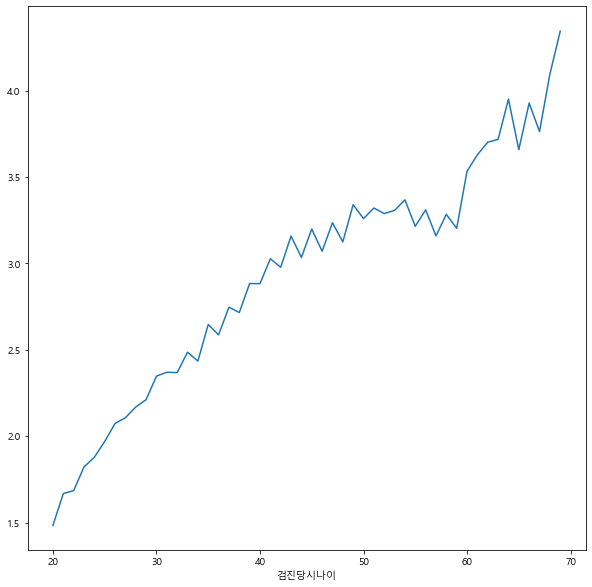

In [613]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

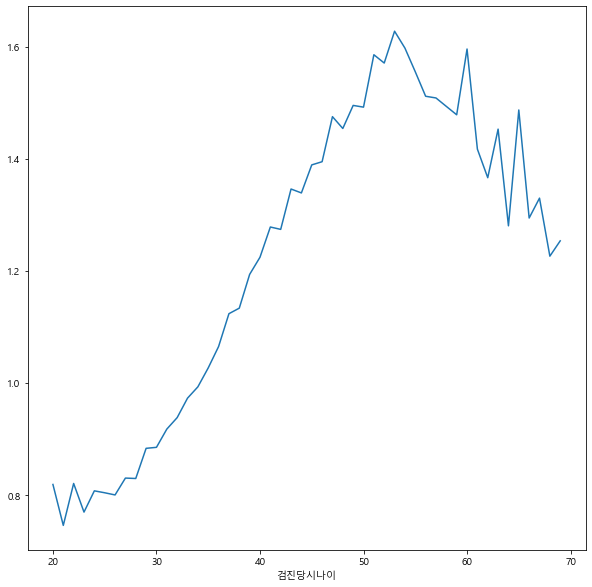

In [614]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

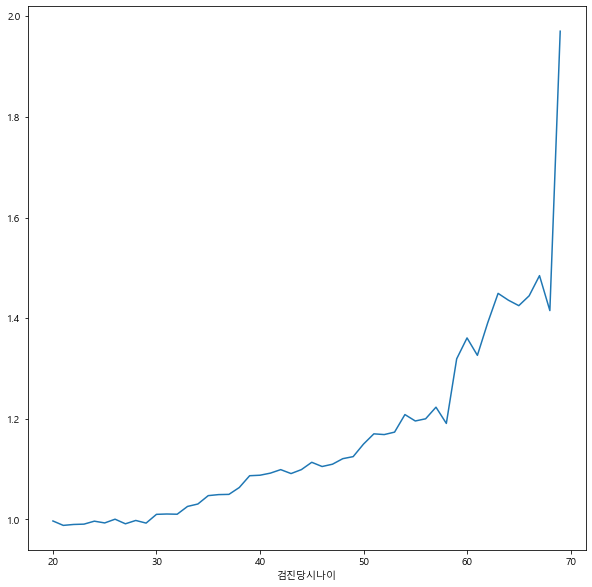

In [615]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

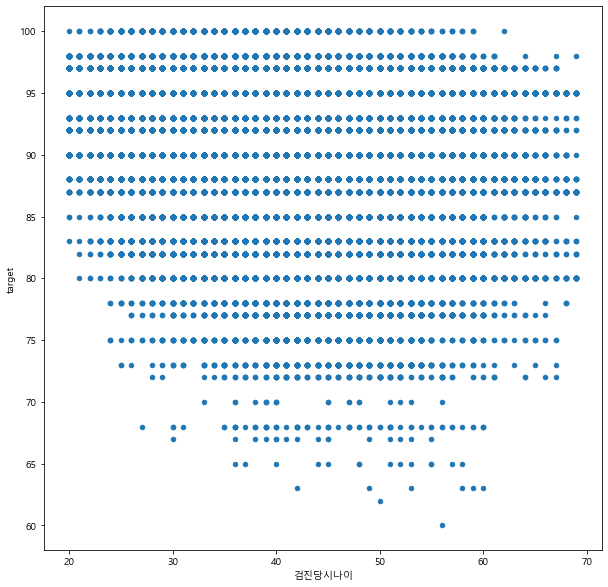

In [616]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

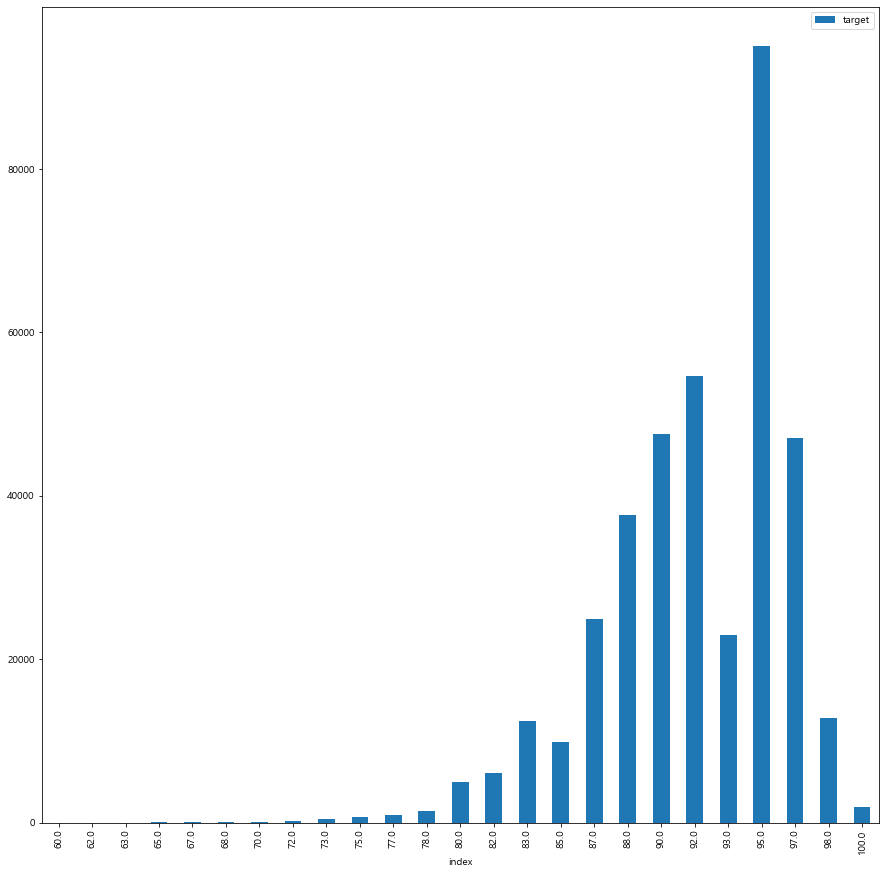

In [617]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [618]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
24,60.0,1
23,62.0,1
22,63.0,6
21,65.0,14
20,67.0,16
18,68.0,69
19,70.0,20
17,72.0,132
16,73.0,380
15,75.0,646


In [619]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [620]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

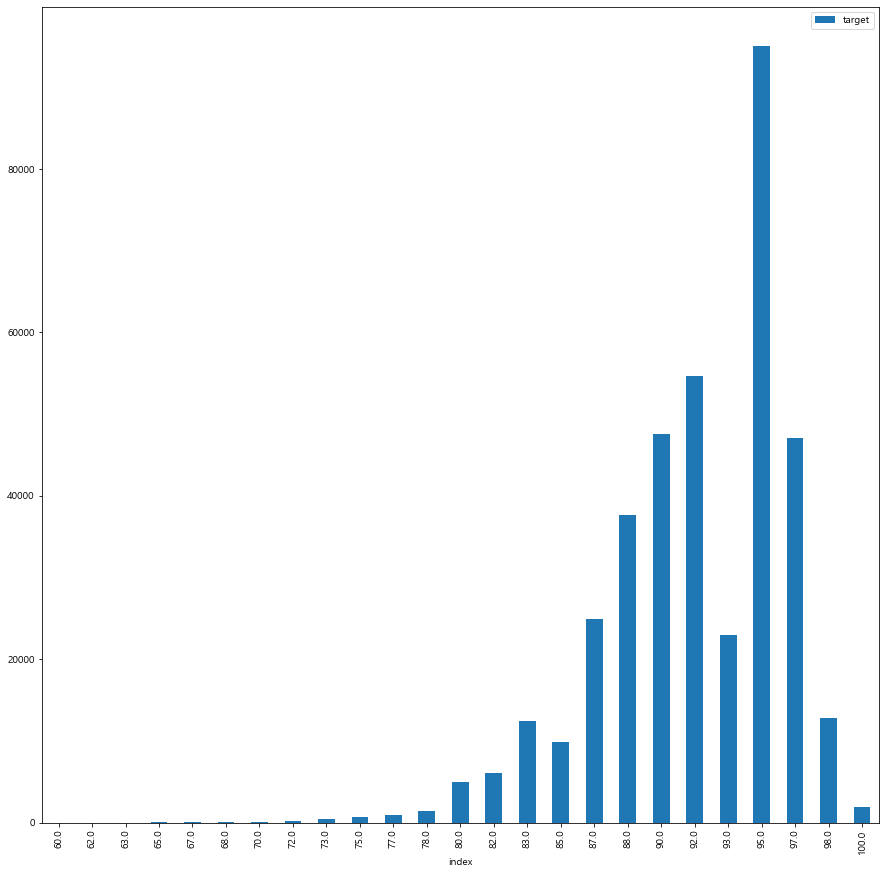

In [621]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [622]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
24,60.0,1
23,62.0,1
22,63.0,6
21,65.0,14
20,67.0,16
18,68.0,69
19,70.0,20
17,72.0,132
16,73.0,380
15,75.0,646


# 나이별 확인하기

In [623]:
# df_woman['검진당시나이'].value_counts()

In [624]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [625]:
# df_woman['검진당시나이'].min()

In [626]:
# df_woman['검진당시나이'].max()

In [627]:
# df_woman.columns

In [628]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [629]:
# df_temp.info()

In [630]:
# df_temp.reset_index(drop=True, inplace=True)

In [631]:
# df_woman = df_temp.copy()

In [632]:
# df_woman['검진당시나이'].value_counts()

In [633]:
# df_woman[df_woman['검진당시나이']==20]

In [634]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [635]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [636]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [637]:
# target_col = '검진당시나이'

In [638]:
target_col

'target'

## Min Max Scaling

In [639]:
from sklearn.preprocessing import MinMaxScaler

In [640]:
scaling_bool

False

In [641]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [642]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [643]:
# model2 = LinearRegression()

In [644]:
# model2.fit(X_train2, y_train2)

In [645]:
# model2.intercept_

In [646]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [647]:
model2 = XGBRegressor()

In [648]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [649]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [650]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 752.30 seconds for 10 candidates parameter settings.


In [651]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [652]:
# best score
random_search.best_score_

-0.0004631340196203567

In [653]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [654]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [655]:
# model = build_model()

In [656]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [657]:
# model.summary()

In [658]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [659]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [660]:
# plot_history(history)

## pyTorch 신경망

In [661]:
np.shape(X_train)[1]

4

In [662]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [663]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [664]:
# epochs = 1000

In [665]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [666]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [667]:
# plt.plot(losses)

## coef 계산

In [668]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [669]:
# df_coef2.columns = ['검사항목', 'coef']

In [670]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [671]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [672]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [673]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [674]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [675]:
# slr2 = LinearRegression()

In [676]:
# slr2.fit(X_train2_poly, y_train2)

In [677]:
# np.shape(X_train2)

In [678]:
# np.shape(X_train2_poly)

In [679]:
# np.shape(X_test2)

In [680]:
# np.shape(X_test2_poly)

In [681]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [682]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [683]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [684]:
import pickle
with open(model_path_woman, 'wb') as f:
    pickle.dump(model2, f)

In [685]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [686]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [687]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [688]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.0006195876611508351
MSE : 0.00036587900966147
RMSE : 0.01912796407518244


In [689]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9999821322251506

In [690]:
model2.score(X_test2, y_test2)

0.9999821322251506

## feature importance

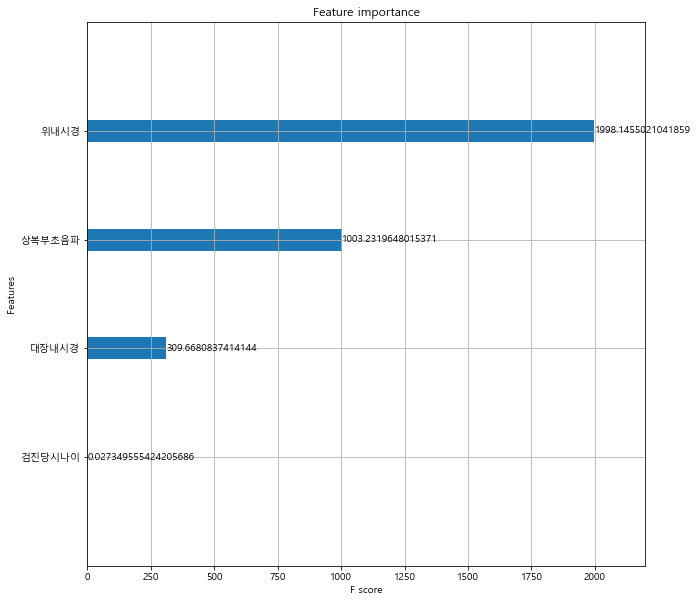

In [691]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [692]:
model2.feature_importances_

array([8.2600291e-06, 6.0347378e-01, 3.0299303e-01, 9.3525000e-02],
      dtype=float32)

In [693]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [694]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,위내시경,0.603474
2,상복부초음파,0.302993
3,대장내시경,0.093525
0,검진당시나이,0.000008


# 실제나이 - 예측나이 결과

In [695]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [696]:
df_test2.head()

,target,0
0,92.0,92.000053
1,88.0,88.000298
2,95.0,95.000008
3,90.0,89.999893
4,83.0,83.000267


In [697]:
df_test2.columns

Index(['target', 0], dtype='object')

In [698]:
df_test2.columns = ['실제지수', '예측지수']

In [699]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [700]:
df_test2.head()

,실제지수,예측지수,diff
0,92.0,92.000053,0.000053
1,88.0,88.000298,0.000298
2,95.0,95.000008,0.000008
3,90.0,89.999893,-0.000107
4,83.0,83.000267,0.000267


In [701]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [702]:
len(df_test2)

95366

In [703]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,92.0,92.000053,0.000053,0.0
1,88.0,88.000298,0.000298,0.0
2,95.0,95.000008,0.000008,0.0
3,90.0,89.999893,-0.000107,-0.0
4,83.0,83.000267,0.000267,0.0


<AxesSubplot:>

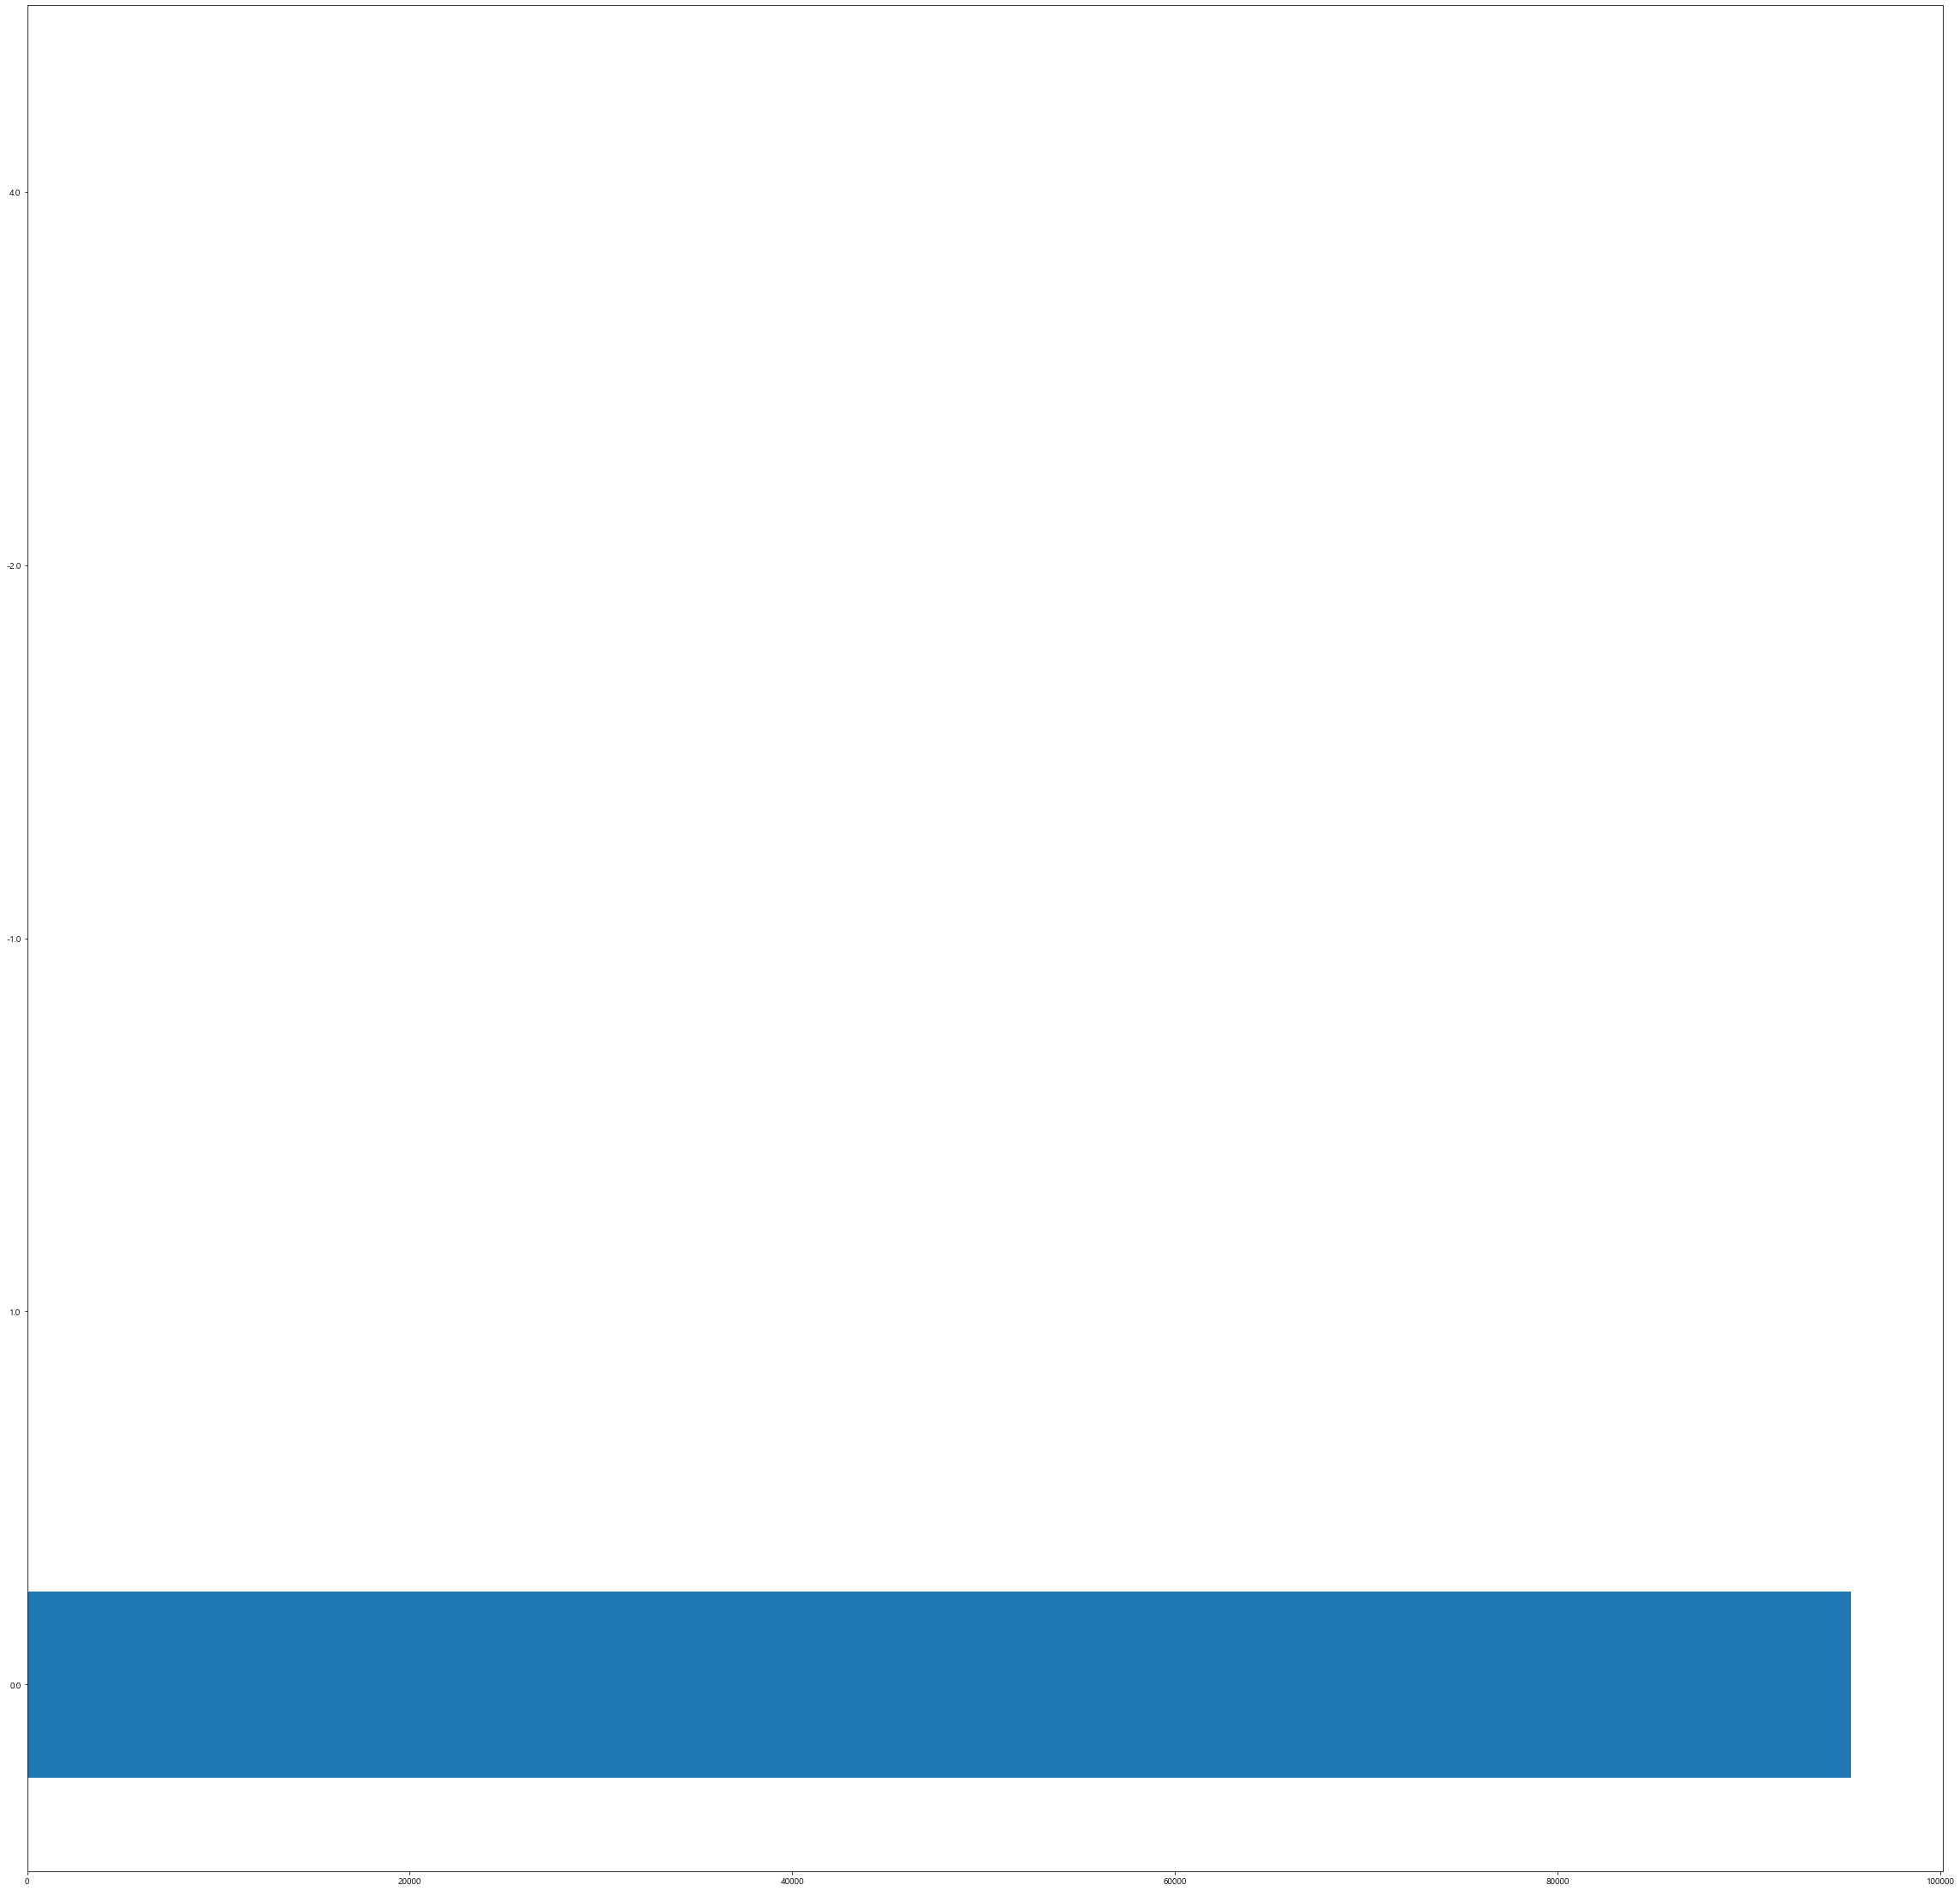

In [704]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [705]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [706]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [707]:
df_train2.round(0).value_counts()

95.0     71275
92.0     41000
90.0     35604
97.0     35352
88.0     28290
87.0     18778
93.0     17254
98.0      9523
83.0      9315
85.0      7428
82.0      4447
80.0      3753
100.0     1392
78.0      1038
77.0       680
75.0       477
73.0       293
72.0        92
68.0        57
70.0        16
67.0        14
65.0        12
63.0         5
62.0         1
60.0         1
dtype: int64

In [708]:
y_test2.value_counts()

95.0     23797
92.0     13634
90.0     11906
97.0     11687
88.0      9394
87.0      6173
93.0      5727
98.0      3227
83.0      3090
85.0      2475
82.0      1597
80.0      1248
100.0      479
78.0       350
77.0       265
75.0       169
73.0        87
72.0        40
68.0        12
70.0         4
67.0         2
65.0         2
63.0         1
Name: target, dtype: int64

In [709]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [710]:
df_plot.columns = ['count']

In [711]:
df_plot.reset_index(inplace=True)

In [712]:
df_plot = df_plot.sort_values('index', ascending=True)

In [713]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

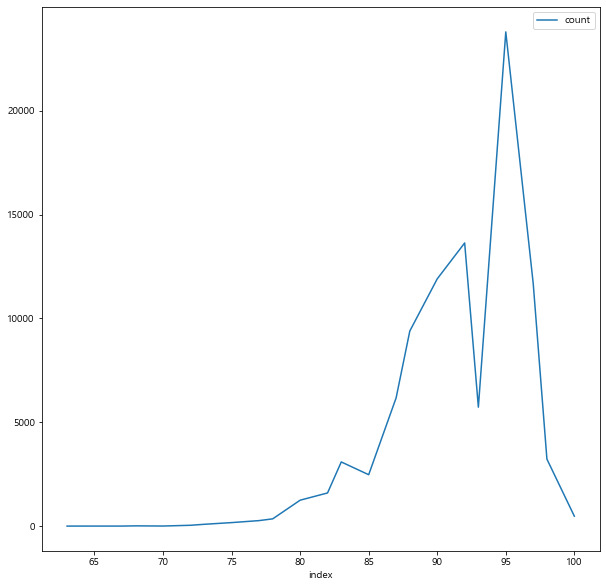

In [714]:
df_plot.plot()

In [715]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [716]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [717]:
df_test2.round(0).value_counts()

95.0     23797
92.0     13634
90.0     11904
97.0     11687
88.0      9394
87.0      6173
93.0      5727
98.0      3227
83.0      3089
85.0      2472
82.0      1598
80.0      1247
100.0      479
78.0       353
77.0       264
75.0       167
73.0        86
72.0        40
68.0        12
84.0         3
70.0         3
65.0         2
76.0         2
89.0         2
67.0         2
69.0         1
63.0         1
dtype: int64

In [718]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [719]:
df_plot2.columns = ['count']

In [720]:
df_plot2.reset_index(inplace=True)

In [721]:
df_plot2

,0,count
0,95.0,23797
1,92.0,13634
2,90.0,11904
3,97.0,11687
4,88.0,9394
5,87.0,6173
6,93.0,5727
7,98.0,3227
8,83.0,3089
9,85.0,2472


In [722]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [723]:
df_plot2.set_index(0, inplace=True)

In [724]:
df_plot2

,count
0,
63.0,1
65.0,2
67.0,2
68.0,12
69.0,1
70.0,3
72.0,40
73.0,86
75.0,167


<AxesSubplot:xlabel='0'>

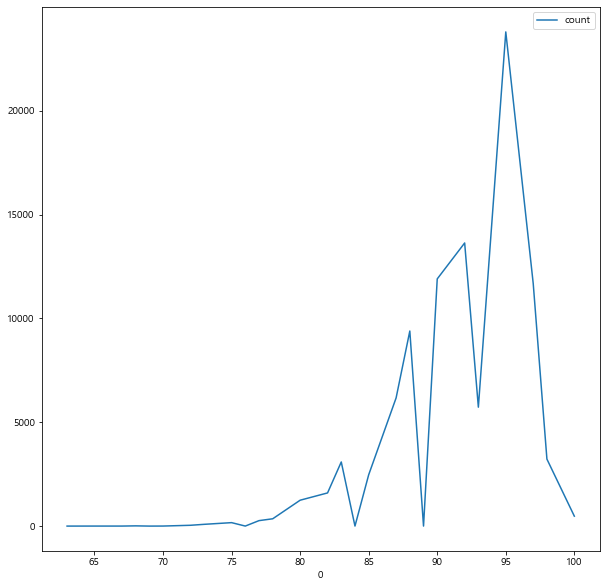

In [725]:
df_plot2.plot()

# 시각화

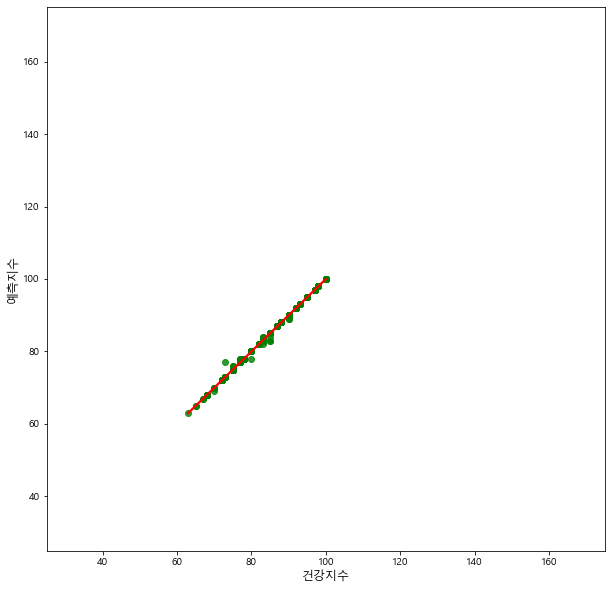

In [726]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [727]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
1,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
2,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0
3,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
4,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0


In [728]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381463 entries, 0 to 381462
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            381463 non-null  int32  
 1   UID             381463 non-null  int64  
 2   CU_REC_ID       381463 non-null  int64  
 3   SEX             381463 non-null  int64  
 4   검진당시나이          381463 non-null  int64  
 5   위내시경            381463 non-null  float64
 6   상복부초음파          381463 non-null  float64
 7   대장내시경           381463 non-null  float64
 8   위내시경_scaling    381463 non-null  float64
 9   상복부초음파_scaling  381463 non-null  float64
 10  대장내시경_scaling   381463 non-null  float64
 11  kde_mean        381463 non-null  float64
 12  target          381463 non-null  float64
dtypes: float64(8), int32(1), int64(4)
memory usage: 36.4 MB


In [729]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target
82231,2021,196909,2495703,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
82232,2022,196909,2495702,2,29,0.0,1.0,0.0,100.0,90.0,100.0,96.67,98.0
82233,2023,196909,2495700,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0
82234,2024,196909,2495697,2,31,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0


In [730]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [731]:
len(df_pred2)

381463

In [732]:
df_pred2.reset_index(drop=True, inplace=True)

In [733]:
X_test2

,검진당시나이,위내시경,상복부초음파,대장내시경
191974,43,4.0,0.0,1.0
58802,42,4.0,2.0,1.0
206737,37,1.0,1.0,1.0
250071,31,4.0,1.0,1.0
246915,39,4.0,5.0,1.0
...,...,...,...,...
304033,36,1.0,3.0,1.0
299162,47,4.0,2.0,1.0
132747,31,4.0,1.0,1.0
139411,56,1.0,0.0,1.0


In [734]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경', '상복부초음파', '대장내시경',
       '위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling', 'kde_mean',
       'target'],
      dtype='object')

In [735]:
df_pred2[train_columns]

,검진당시나이,위내시경,상복부초음파,대장내시경
0,34,1.0,1.0,1.0
1,35,1.0,1.0,1.0
2,26,1.0,0.0,1.0
3,28,1.0,1.0,1.0
4,29,4.0,1.0,1.0
...,...,...,...,...
381458,60,6.0,1.0,1.0
381459,62,6.0,1.0,1.0
381460,56,6.0,1.0,1.0
381461,30,1.0,1.0,1.0


In [736]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [737]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [738]:
pred_data2

array([95.00001 , 95.00001 , 96.99998 , ..., 87.00005 , 95.000015,
       95.00001 ], dtype=float32)

In [739]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [740]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [741]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수
0,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008
1,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008
2,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0,96.999977
3,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000015
4,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0,89.999893
5,2020,54,497669,2,30,1.0,0.0,5.0,90.0,100.0,50.0,80.00,90.0,90.000305
6,2022,54,1319859,2,32,0.0,0.0,1.0,100.0,100.0,90.0,96.67,98.0,98.000053
7,2023,54,2039511,2,33,4.0,0.0,1.0,60.0,100.0,90.0,83.33,92.0,92.000046
8,2024,54,2750990,2,34,2.0,0.0,5.0,80.0,100.0,50.0,76.67,88.0,87.998856
9,2019,56,1605927,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000015


## 예측지수 성능평가

In [742]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.0006294768397413687

# target으로 나이 계산

In [743]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [744]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008,35.00
1,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008,36.00
2,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0,96.999977,26.60
3,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000015,29.00
4,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0,89.999893,31.00
5,2020,54,497669,2,30,1.0,0.0,5.0,90.0,100.0,50.0,80.00,90.0,90.000305,32.00
6,2022,54,1319859,2,32,0.0,0.0,1.0,100.0,100.0,90.0,96.67,98.0,98.000053,32.40
7,2023,54,2039511,2,33,4.0,0.0,1.0,60.0,100.0,90.0,83.33,92.0,92.000046,34.60
8,2024,54,2750990,2,34,2.0,0.0,5.0,80.0,100.0,50.0,76.67,88.0,87.998856,36.40
9,2019,56,1605927,2,30,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000015,31.00


## 예측나이 성능평가

In [745]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.6496167124989842

# 최종 산출

In [746]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,위내시경_scaling,상복부초음파_scaling,대장내시경_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008,35.0
1,2023,48,2484053,2,35,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000008,36.0
2,2021,53,2632765,2,26,1.0,0.0,1.0,90.0,100.0,90.0,93.33,97.0,96.999977,26.6
3,2023,53,2632764,2,28,1.0,1.0,1.0,90.0,90.0,90.0,90.00,95.0,95.000015,29.0
4,2024,53,2658222,2,29,4.0,1.0,1.0,60.0,90.0,90.0,80.00,90.0,89.999893,31.0


# DataMart csv

In [747]:
df_copy = df.copy()

In [748]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경 (Endo)_text,위내시경,상복부초음파 (Abdominal Sono)_text,상복부초음파,대장내시경_text,대장내시경
0,2010,7282,2520,1,42,위축성위염,6.0,간혈관종의심,2.0,None,NaN
1,2010,7490,3638,1,39,"역류성식도염,홍반성위염",4.0,None,NaN,None,NaN
2,2010,7915,3997,1,36,None,NaN,None,NaN,None,NaN
3,2010,8056,4745,1,42,전립선비대증,NaN,None,NaN,None,NaN
4,2010,8457,3929,1,38,None,NaN,None,NaN,None,NaN


In [749]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   위내시경 (Endo)_text              817030 non-null   object 
 6   위내시경                          782071 non-null   float64
 7   상복부초음파 (Abdominal Sono)_text  780855 non-null   object 
 8   상복부초음파                        763819 non-null   float64
 9   대장내시경_text                    189844 non-null   object 
 10  대장내시경                         183662 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 97.2+ MB


In [750]:
minimums

[0, 0, 0]

In [751]:
maximums

[10, 10, 10]

In [752]:
train_columns

['검진당시나이', '위내시경', '상복부초음파', '대장내시경']

In [753]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [754]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [755]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [756]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경 (Endo)_text,위내시경,상복부초음파 (Abdominal Sono)_text,상복부초음파,대장내시경_text,대장내시경
10,2010,15894,2533,2,29,None,NaN,None,NaN,None,NaN
22,2010,42223,1364,2,24,만성표재성위염,4.0,None,NaN,None,NaN
37,2011,364096,6645,2,32,출혈성위염,2.0,없음,0.0,NaN,NaN
45,2010,120518,3595,2,30,None,NaN,None,NaN,None,NaN
63,2011,698706,6600,2,36,NaN,NaN,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [757]:
target_cols

['위내시경', '상복부초음파', '대장내시경']

In [758]:
df_woman_csv.dropna(subset=target_cols_temp, how='all', inplace=True)

In [759]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [760]:
len(df_woman_csv)

361428

## fillna

In [761]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경', '상복부초음파', '대장내시경',
       '위내시경_scaling', '상복부초음파_scaling', '대장내시경_scaling', 'kde_mean',
       'target'],
      dtype='object')

In [762]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경 (Endo)_text', '위내시경',
       '상복부초음파 (Abdominal Sono)_text', '상복부초음파', '대장내시경_text', '대장내시경'],
      dtype='object')

In [763]:
df_woman_csv.isnull().sum()

검진년도                                 0
UID                                  0
CU_REC_ID                            0
SEX                                  0
검진당시나이                               0
위내시경 (Endo)_text                 70939
위내시경                             81022
상복부초음파 (Abdominal Sono)_text     81111
상복부초음파                           87086
대장내시경_text                      307877
대장내시경                           310034
dtype: int64

In [764]:
df_woman_csv[score_text_real].fillna(fill_th, inplace=True)
df_woman_csv[score_text_real2].fillna(fill_th, inplace=True)
df_woman_csv[score_text_real3].fillna(fill_th, inplace=True)

In [765]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

### 수축기 혈압

In [766]:
# screening = 80

In [767]:
# scr_col = '수축기 혈압'

In [768]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [769]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [770]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [771]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [772]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

## 컬럼 순서 변경

In [773]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '위내시경 (Endo)_text', '위내시경',
       '상복부초음파 (Abdominal Sono)_text', '상복부초음파', '대장내시경_text', '대장내시경'],
      dtype='object')

In [774]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        score_text_real, score_text_real2, score_text_real3,
       ]

df_woman_csv = df_woman_csv[cols_temp]

## 모델 예측

In [775]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [776]:
pred_data2 = pred_data2.round(0)

In [777]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [778]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수
0,2010,42223,1364,2,24,4.0,1.0,1.0,90.0
1,2011,364096,6645,2,32,2.0,0.0,1.0,95.0
2,2010,167053,3087,2,26,4.0,1.0,1.0,90.0
3,2019,7687,1867229,2,42,10.0,3.0,1.0,77.0
4,2019,8011,1900641,2,34,1.0,1.0,1.0,95.0


### 성능 평가

In [779]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [780]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [781]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [782]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.8270222561616698


In [783]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9398293868116308

In [784]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
0,2010,42223,1364,2,24,4.0,1.0,1.0,90.0,26.0
1,2011,364096,6645,2,32,2.0,0.0,1.0,95.0,33.0
2,2010,167053,3087,2,26,4.0,1.0,1.0,90.0,28.0
3,2019,7687,1867229,2,42,10.0,3.0,1.0,77.0,46.6
4,2019,8011,1900641,2,34,1.0,1.0,1.0,95.0,35.0


In [785]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361428 entries, 0 to 361427
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       361428 non-null  int32  
 1   UID        361428 non-null  int64  
 2   CU_REC_ID  361428 non-null  int64  
 3   SEX        361428 non-null  int64  
 4   검진당시나이     361428 non-null  int64  
 5   위내시경       361428 non-null  float64
 6   상복부초음파     361428 non-null  float64
 7   대장내시경      361428 non-null  float64
 8   예측지수       361428 non-null  float32
 9   예측나이       361428 non-null  float64
dtypes: float32(1), float64(4), int32(1), int64(4)
memory usage: 24.8 MB


# 최종 UID별 확인

In [786]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
92961,2021,261581,806568,2,50,1.0,1.0,0.0,97.0,50.6
92968,2021,261581,2243879,2,50,1.0,1.0,0.0,97.0,50.6
92969,2021,261581,2418909,2,50,1.0,1.0,0.0,97.0,50.6
92970,2021,261581,2418910,2,50,1.0,1.0,0.0,97.0,50.6
146888,2022,261581,751339,2,51,6.0,5.0,1.0,80.0,55.0
146891,2022,261581,2243878,2,51,6.0,5.0,1.0,80.0,55.0
228158,2023,261581,1519764,2,52,6.0,1.0,0.0,88.0,54.4
228159,2023,261581,2243877,2,52,6.0,1.0,0.0,88.0,54.4
330921,2024,261581,2418911,2,53,6.0,1.0,1.0,87.0,55.6


In [787]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
46119,2022,477944,956268,2,31,0.0,1.0,1.0,97.0,31.6
175141,2022,477944,2212776,2,31,0.0,1.0,1.0,97.0,31.6
266609,2023,477944,1454346,2,32,4.0,1.0,1.0,90.0,34.0
266610,2023,477944,2212775,2,32,4.0,1.0,1.0,90.0,34.0
341965,2024,477944,2362855,2,33,4.0,1.0,0.0,92.0,34.6


In [788]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
289076,2023,896916,1459636,2,28,4.0,0.0,1.0,92.0,29.6
289066,2023,896916,1842092,2,28,4.0,0.0,1.0,92.0,29.6
289077,2023,896916,2031853,2,28,4.0,0.0,1.0,92.0,29.6
289078,2023,896916,2253054,2,28,4.0,0.0,1.0,92.0,29.6
283851,2023,896916,2257188,2,28,4.0,0.0,1.0,92.0,29.6
351697,2024,896916,2253058,2,29,4.0,0.0,1.0,92.0,30.6


# 최종 CSV 병합 Extract

In [789]:
len(df_man_csv)

639185

In [790]:
len(df_woman_csv)

361428

In [791]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [792]:
df_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,위내시경,상복부초음파,대장내시경,예측지수,예측나이
0,2010,7282,2520,1,42,6.0,2.0,1.0,85.0,45.0
1,2010,7490,3638,1,39,4.0,1.0,1.0,90.0,41.0
2,2010,8634,4751,1,43,2.0,1.0,1.0,93.0,44.4
3,2010,11158,1703,1,37,4.0,1.0,1.0,90.0,39.0
4,2010,13999,3816,1,53,4.0,1.0,1.0,90.0,55.0


In [793]:
df_csv.to_csv(csv_path)